#### Exploratory Data Analysis (EDA)

Dataset: 

- _videogames_clean.csv_

Author: Luis Sergio Pastrana Lemus  
Date: 2025-05-29

# Exploratory Data Analysis – Videogames Dataset

## __1. Libraries__

In [1]:
from pathlib import Path
import sys

# Define project root dynamically, gets the current directory from which the notebook belongs and moves one level upper
project_root = Path.cwd().parent

# Add src to sys.path if it is not already
if str(project_root) not in sys.path:

    sys.path.append(str(project_root))

# Import function directly (more controlled than import *)
from src import *


from IPython.display import display, HTML
import numpy as np
import os
import pandas as pd

## __2. Path to Data file__

In [2]:
# Build route to data file and upload
data_file_path = project_root / "data" / "processed" / "clean"
df_vg = load_dataset_from_csv(data_file_path, "videogames_clean.csv", sep=',', header='infer')

data_file_path = project_root / "data" / "processed" / "feature"
df_vg_platform_sales = load_dataset_from_csv(data_file_path, "vg_platform_sales_feature.csv", sep=',', header='infer')
df_vg_platform_top_sales_year = load_dataset_from_csv(data_file_path, "vg_platform_top_sales_year_feature.csv", sep=',', header='infer')

## __3. Exploratory Data Analysis__

### 3.0 Casting Data types

In [3]:
df_vg = cast_datatypes(df_vg)

In [4]:
df_vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16715 non-null  string  
 1   platform         16715 non-null  category
 2   year_of_release  16713 non-null  float64 
 3   genre            16715 non-null  category
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     15360 non-null  float32 
 9   user_score       15185 non-null  float32 
 10  rating           15390 non-null  object  
dtypes: category(2), float32(2), float64(5), object(1), string(1)
memory usage: 1.1+ MB


In [5]:
# Adjust sales values for better visualization: original values (in millions) are scaled up by 1000
# to convert them to thousands, improving readability in graphs.
sales_columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
df_vg[sales_columns] = df_vg[sales_columns] * 1000

### 3.1  Descriptive Statistics

#### 3.1.1 Descriptive statistics for videogames datasets

In [6]:
# Descriptive statistics for videogames dataset
df_vg.describe(include='all')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
count,16715,16715,16713.000000,16715,16715.000000,16715.000000,16715.000000,16715.000000,15360.000000,15185.000000,15390
unique,11531,31,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,8
top,need_for_sp...,ps2,NaN,action,NaN,NaN,NaN,NaN,NaN,NaN,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,NaN,6560
mean,NaN,NaN,2006.456770,NaN,263.377206,145.059527,77.617110,47.341908,69.318771,7.211998,NaN
std,NaN,NaN,5.941257,NaN,813.603522,503.338514,308.853426,186.731041,11.626289,1.214103,NaN
min,NaN,NaN,1977.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,63.000000,6.800000,NaN
50%,NaN,NaN,2007.000000,NaN,80.000000,20.000000,0.000000,10.000000,70.000000,7.400000,NaN
75%,NaN,NaN,2010.000000,NaN,240.000000,110.000000,40.000000,30.000000,76.000000,8.000000,NaN


#### 3.1.2 Descriptive statistics for videogames dataset, quantitative values

<table>
  <thead>
    <tr>
      <th>CV (%)</th>
      <th>Interpretation for Coefficient of Variation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><small><strong>0–10%</strong></small></td>
      <td><small><strong>Very low</strong> variability → <strong>very reliable</strong> Mean</small></td>
    </tr>
    <tr>
      <td><small><strong>10–20%</strong></small></td>
      <td><small><strong>Moderate</strong> variability → <strong>reliable</strong> Mean</small></td>
    </tr>
    <tr>
      <td><small><strong>20–30%</strong></small></td>
      <td><small><strong>Considerable</strong> variability → <strong>some what skewed</strong> Mean</small></td>
    </tr>
    <tr>
      <td><small><strong>>30%</strong></small></td>
      <td><small>High<strong> variability</strong> → <strong>prefer</strong> Median</small></td>
    </tr>
  </tbody>
</table>


#### 3.1.2.1 Descriptive statistics for videogames 'year_of_release' column

In [7]:
df_vg['year_of_release'].describe()

count    16713.000000
mean      2006.456770
std          5.941257
min       1977.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2023.000000
Name: year_of_release, dtype: float64

In [8]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_vg, 'year_of_release')

In [9]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_vg, 'year_of_release', bound='both', clamp_zero=False)

(                 name platform  year_of_release       genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating
 1      super_mario...      nes          1985.0     platform   29080.0    3580.0    6810.0        770.0           NaN         NaN    NaN
 5              tetris       gb          1989.0       puzzle   23200.0    2260.0    4220.0        580.0           NaN         NaN    NaN
 9           duck_hunt      nes          1984.0      shooter   26930.0     630.0     280.0        470.0           NaN         NaN    NaN
 18     super_mario...     snes          1990.0     platform   12780.0    3750.0    3540.0        550.0           NaN         NaN    NaN
 21     super_mario...       gb          1989.0     platform   10830.0    2710.0    4180.0        420.0           NaN         NaN    NaN
 ...               ...      ...             ...          ...       ...       ...       ...          ...           ...         ...    ...
 14610            doom       pc          

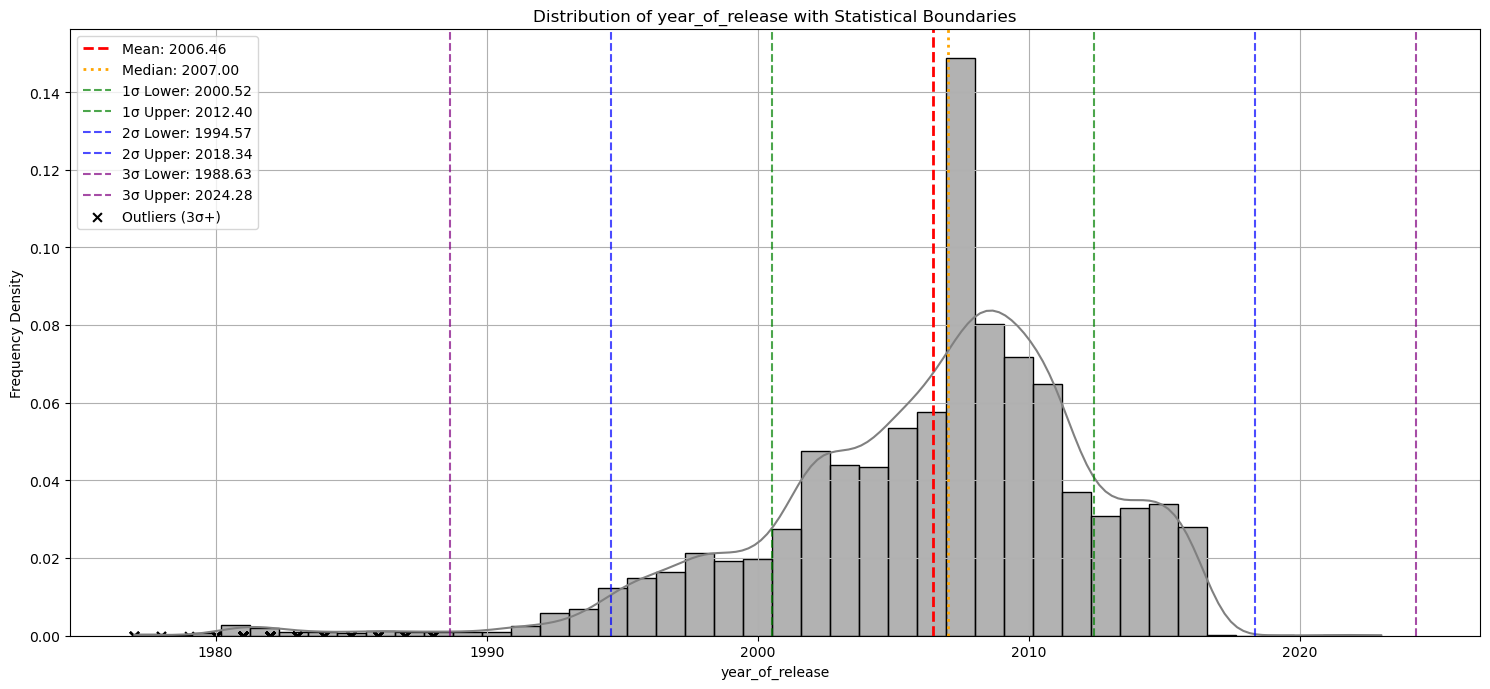

In [10]:
plot_distribution_dispersion(df_vg, 'year_of_release', bins=43)

#### 3.1.2.2 Descriptive statistics for videogames 'na_sales' column

In [11]:
df_vg['na_sales'].describe()

count    16715.000000
mean       263.377206
std        813.603522
min          0.000000
25%          0.000000
50%         80.000000
75%        240.000000
max      41360.000000
Name: na_sales, dtype: float64

In [12]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_vg, 'na_sales')

In [13]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_vg, 'na_sales', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
 Index: [],
                 name platform  year_of_release         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating
 0         wii_sports      wii          2006.0         sports   41360.0   28960.0    3770.0       8450.0          76.0         8.0      E
 1     super_mario...      nes          1985.0       platform   29080.0    3580.0    6810.0        770.0           NaN         NaN    NaN
 2     mario_kart_wii      wii          2008.0         racing   15680.0   12760.0    3790.0       3290.0          82.0         8.3      E
 3     wii_sports_...      wii          2009.0         sports   15610.0   10930.0    3280.0       2950.0          80.0         8.0      E
 4     pokemon_red...       gb          1996.0   role_playing   11270.0    8890.0   10220.0       1000.0           NaN         NaN    NaN
 ...           

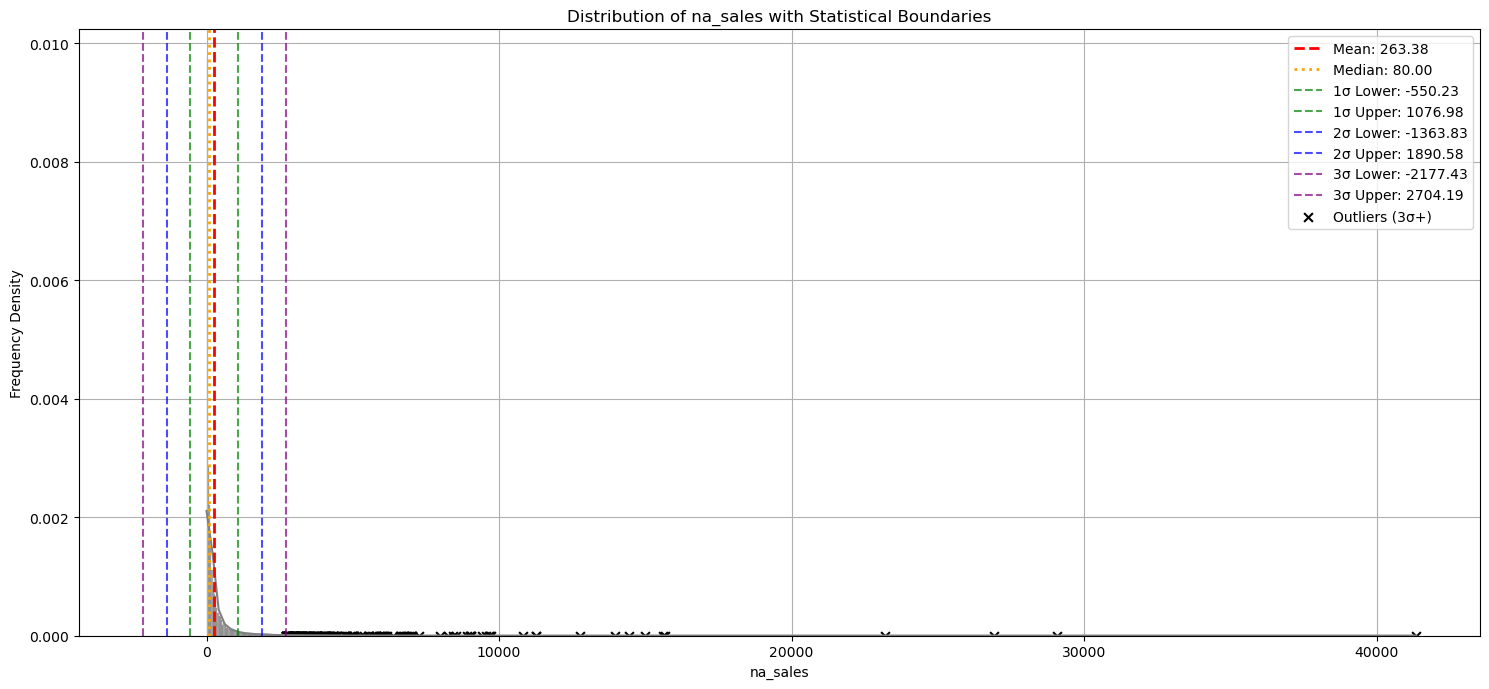

In [14]:
plot_distribution_dispersion(df_vg, 'na_sales', bins=1000)

#### 3.1.2.3 Descriptive statistics for videogames 'eu_sales' column

In [15]:
df_vg['na_sales'].describe()

count    16715.000000
mean       263.377206
std        813.603522
min          0.000000
25%          0.000000
50%         80.000000
75%        240.000000
max      41360.000000
Name: na_sales, dtype: float64

In [16]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_vg, 'eu_sales')

In [17]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_vg, 'eu_sales', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
 Index: [],
                 name platform  year_of_release         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating
 0         wii_sports      wii          2006.0         sports   41360.0   28960.0    3770.0       8450.0          76.0        8.00      E
 1     super_mario...      nes          1985.0       platform   29080.0    3580.0    6810.0        770.0           NaN         NaN    NaN
 2     mario_kart_wii      wii          2008.0         racing   15680.0   12760.0    3790.0       3290.0          82.0        8.30      E
 3     wii_sports_...      wii          2009.0         sports   15610.0   10930.0    3280.0       2950.0          80.0        8.00      E
 4     pokemon_red...       gb          1996.0   role_playing   11270.0    8890.0   10220.0       1000.0           NaN         NaN    NaN
 ...           

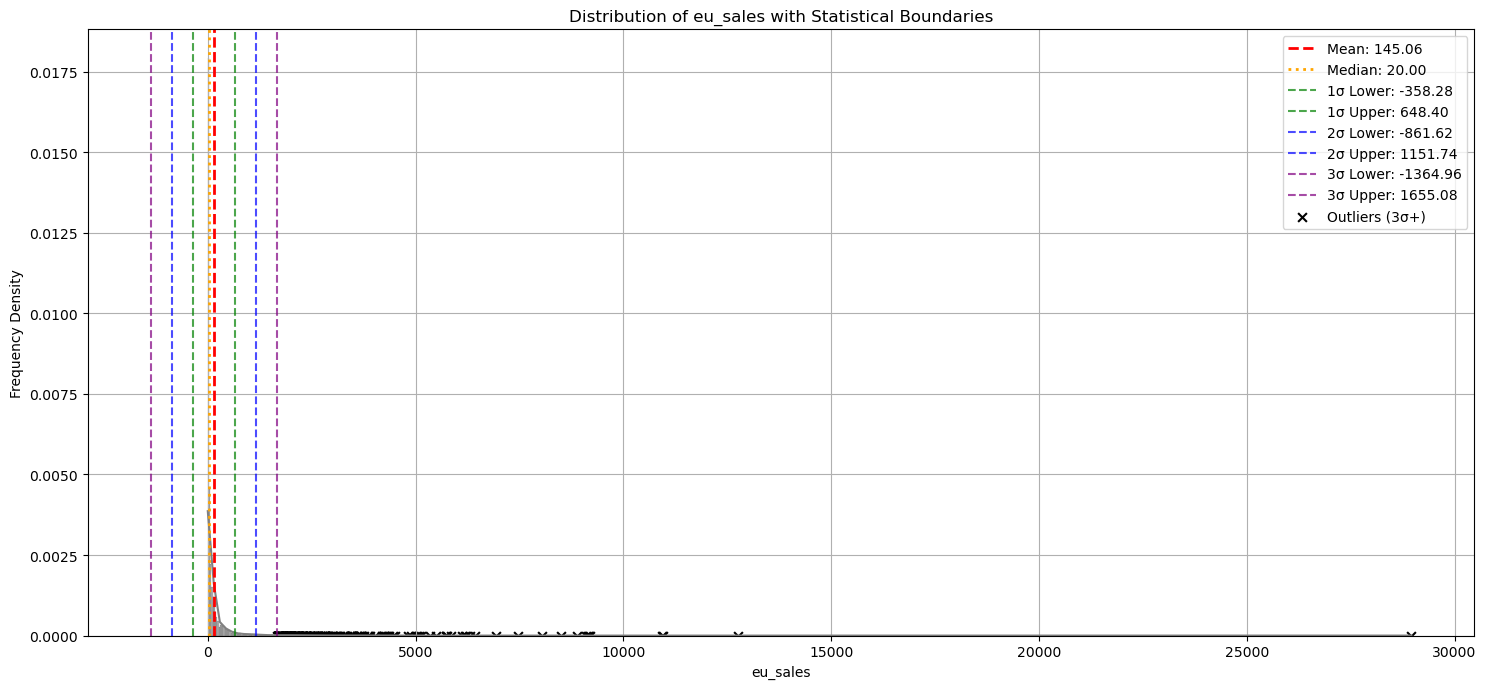

In [18]:
plot_distribution_dispersion(df_vg, 'eu_sales', bins=1000)

#### 3.1.2.4 Descriptive statistics for videogames 'jp_sales' column

In [19]:
df_vg['jp_sales'].describe()

count    16715.000000
mean        77.617110
std        308.853426
min          0.000000
25%          0.000000
50%          0.000000
75%         40.000000
max      10220.000000
Name: jp_sales, dtype: float64

In [20]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_vg, 'jp_sales')

In [21]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_vg, 'eu_sales', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
 Index: [],
                 name platform  year_of_release         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating
 0         wii_sports      wii          2006.0         sports   41360.0   28960.0    3770.0       8450.0          76.0        8.00      E
 1     super_mario...      nes          1985.0       platform   29080.0    3580.0    6810.0        770.0           NaN         NaN    NaN
 2     mario_kart_wii      wii          2008.0         racing   15680.0   12760.0    3790.0       3290.0          82.0        8.30      E
 3     wii_sports_...      wii          2009.0         sports   15610.0   10930.0    3280.0       2950.0          80.0        8.00      E
 4     pokemon_red...       gb          1996.0   role_playing   11270.0    8890.0   10220.0       1000.0           NaN         NaN    NaN
 ...           

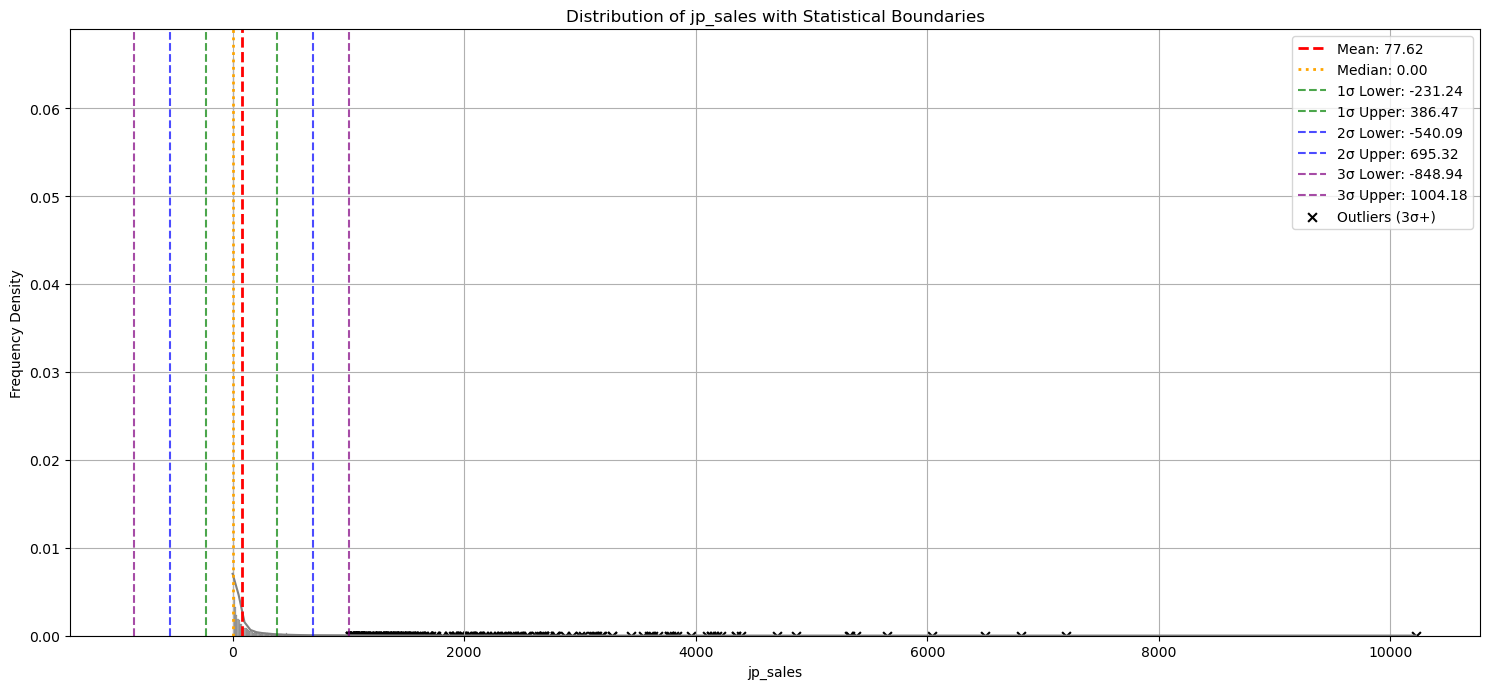

In [22]:
plot_distribution_dispersion(df_vg, 'jp_sales', bins=1000)

#### 3.1.2.5 Descriptive statistics for videogames 'other_sales' column

In [23]:
df_vg['other_sales'].describe()

count    16715.000000
mean        47.341908
std        186.731041
min          0.000000
25%          0.000000
50%         10.000000
75%         30.000000
max      10570.000000
Name: other_sales, dtype: float64

In [24]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_vg, 'other_sales')

In [25]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_vg, 'other_sales', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
 Index: [],
                 name platform  year_of_release         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating
 0         wii_sports      wii          2006.0         sports   41360.0   28960.0    3770.0       8450.0          76.0        8.00      E
 1     super_mario...      nes          1985.0       platform   29080.0    3580.0    6810.0        770.0           NaN         NaN    NaN
 2     mario_kart_wii      wii          2008.0         racing   15680.0   12760.0    3790.0       3290.0          82.0        8.30      E
 3     wii_sports_...      wii          2009.0         sports   15610.0   10930.0    3280.0       2950.0          80.0        8.00      E
 4     pokemon_red...       gb          1996.0   role_playing   11270.0    8890.0   10220.0       1000.0           NaN         NaN    NaN
 ...           

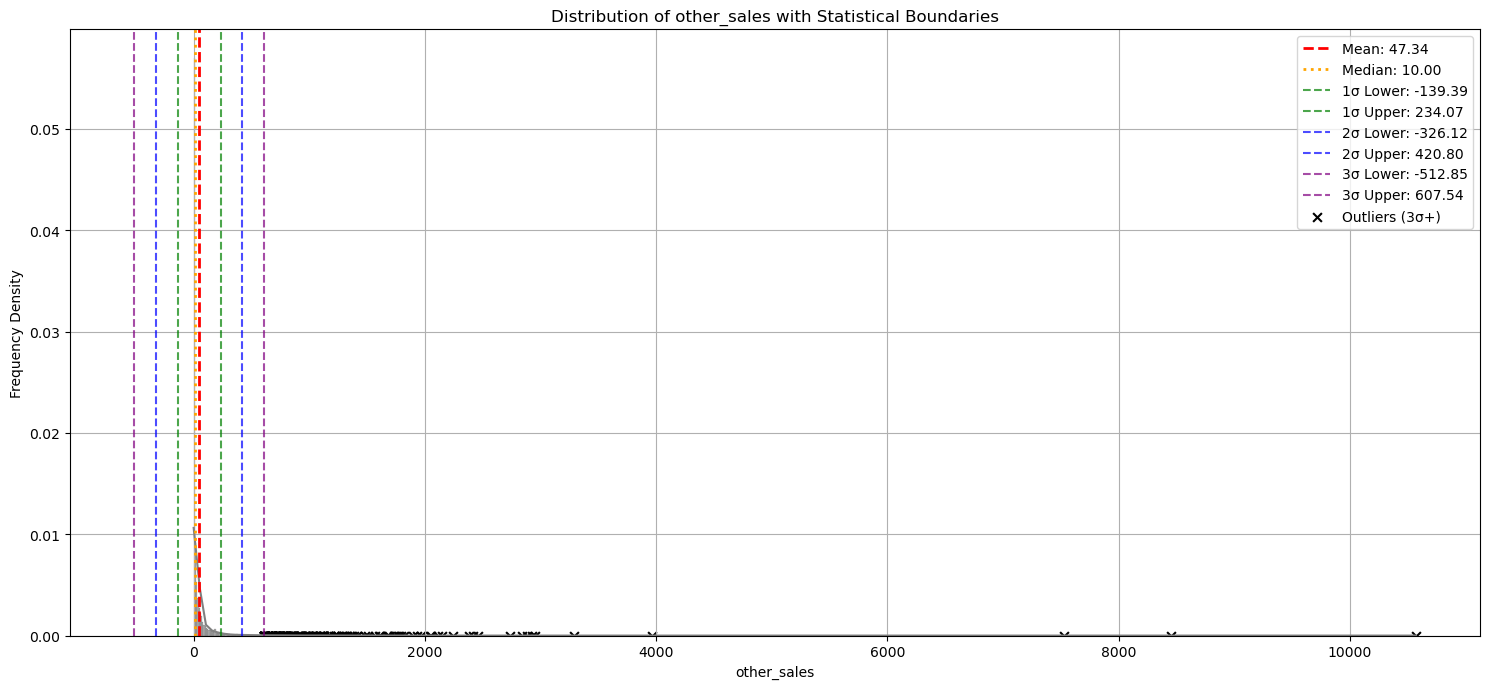

In [26]:
plot_distribution_dispersion(df_vg, 'other_sales', bins=1000)

### 3.2 Data Visualization: Distributions and Relationships

#### 3.2.1 Covariance and Correlation Analysis 

##### 3.2.1.1 Covariance Matrix

In [27]:
# Covariance for video games data
df_vg[['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']].cov()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
year_of_release,35.298529,-447.818621,14.120575,-301.322724,42.184575,-1.996080,-1.657403
na_sales,-447.818621,661950.691439,313418.319354,112975.895304,97026.818791,1655.175003,58.173118
eu_sales,14.120575,313418.319354,253349.659912,67633.601829,67934.413952,1098.351318,23.878354
jp_sales,-301.322724,112975.895304,67633.601829,95390.438525,16787.808317,417.567398,37.716177
other_sales,42.184575,97026.818791,67934.413952,16787.808317,34868.481572,374.020146,8.367815
critic_score,-1.996080,1655.175003,1098.351318,417.567398,374.020146,135.169364,6.935640
user_score,-1.657403,58.173118,23.878354,37.716177,8.367815,6.935640,1.474058


##### 3.2.1.2 Correlation Matrix

| Correlation Value     | Interpretation                |
| --------------------- | ----------------------------- |
| `+0.7` to `+1.0`      | Strong positive correlation   |
| `+0.3` to `+0.7`      | Moderate positive correlation |
| `0.0` to `+0.3`       | Weak positive correlation     |
| `0`                   | No correlation                |
| `-0.3` to `0`         | Weak negative correlation     |
| `-0.7` to `-0.3`      | Moderate negative correlation |
| `-1.0` to `-0.7`      | Strong negative correlation   |


In [28]:
# Correlation for video games data
df_vg[['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']].corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
year_of_release,1.000000,-0.092638,0.004722,-0.164201,0.038022,-0.037168,-0.299696
na_sales,-0.092638,1.000000,0.765335,0.449594,0.638649,0.198730,0.066704
eu_sales,0.004722,0.765335,1.000000,0.435061,0.722792,0.184806,0.038313
jp_sales,-0.164201,0.449594,0.435061,1.000000,0.291089,0.134118,0.115805
other_sales,0.038022,0.638649,0.722792,0.291089,1.000000,0.166257,0.035426
critic_score,-0.037168,0.198730,0.184806,0.134118,0.166257,1.000000,0.491288
user_score,-0.299696,0.066704,0.038313,0.115805,0.035426,0.491288,1.000000


In [29]:
evaluate_correlation(df_vg)

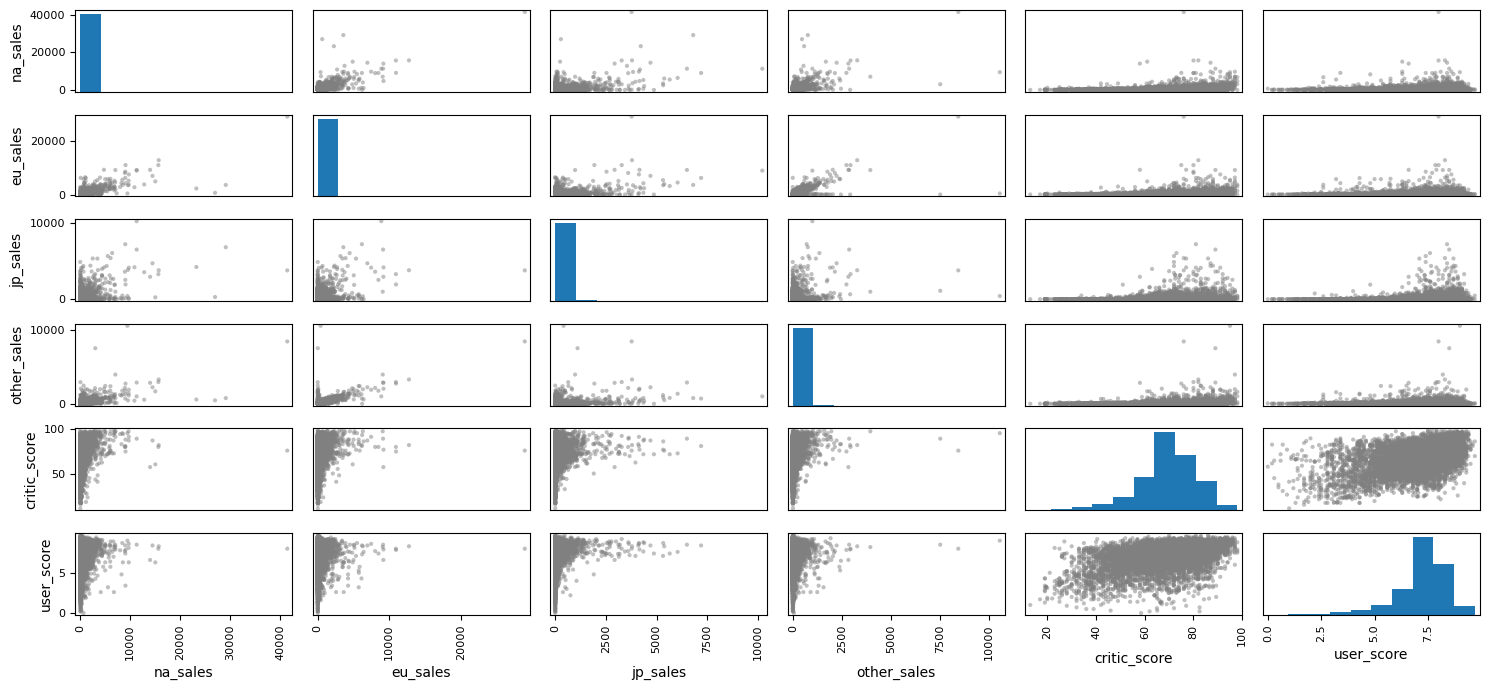

In [30]:
plot_scatter_matrix(df_vg[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']])

### 3.3 Data Visualization: Data dispersion and outliers

3.3.1 Data dispersion and outliers for 'year_of_release'

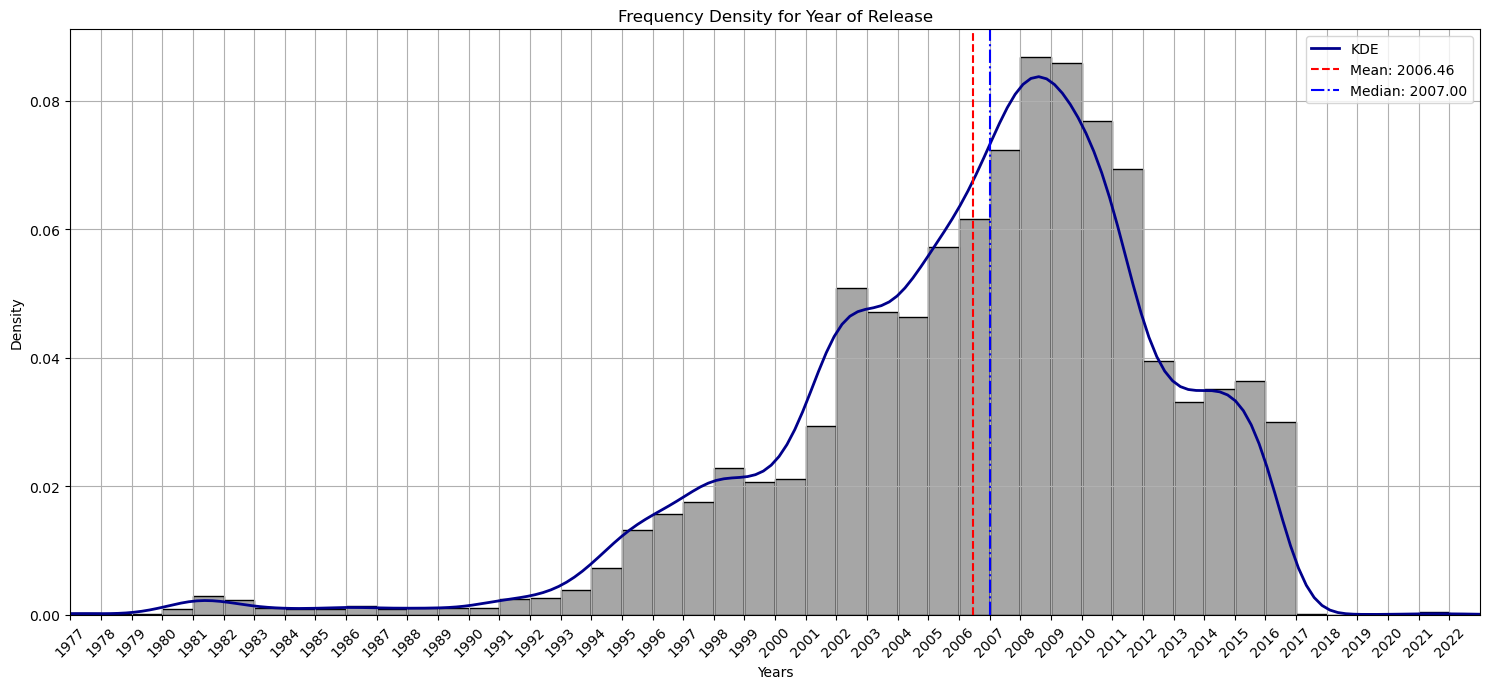

In [31]:
# Year of Release Distribution Frequency and Frequency density
plot_frequency_density(df_vg['year_of_release'], bins=range(1977, 2023, 1), color='grey', title='Frequency Density for Year of Release', xlabel='Years', 
                       ylabel='Density', xticks_range=(1977, 2023, 1), rotation=45, show_kde=True)

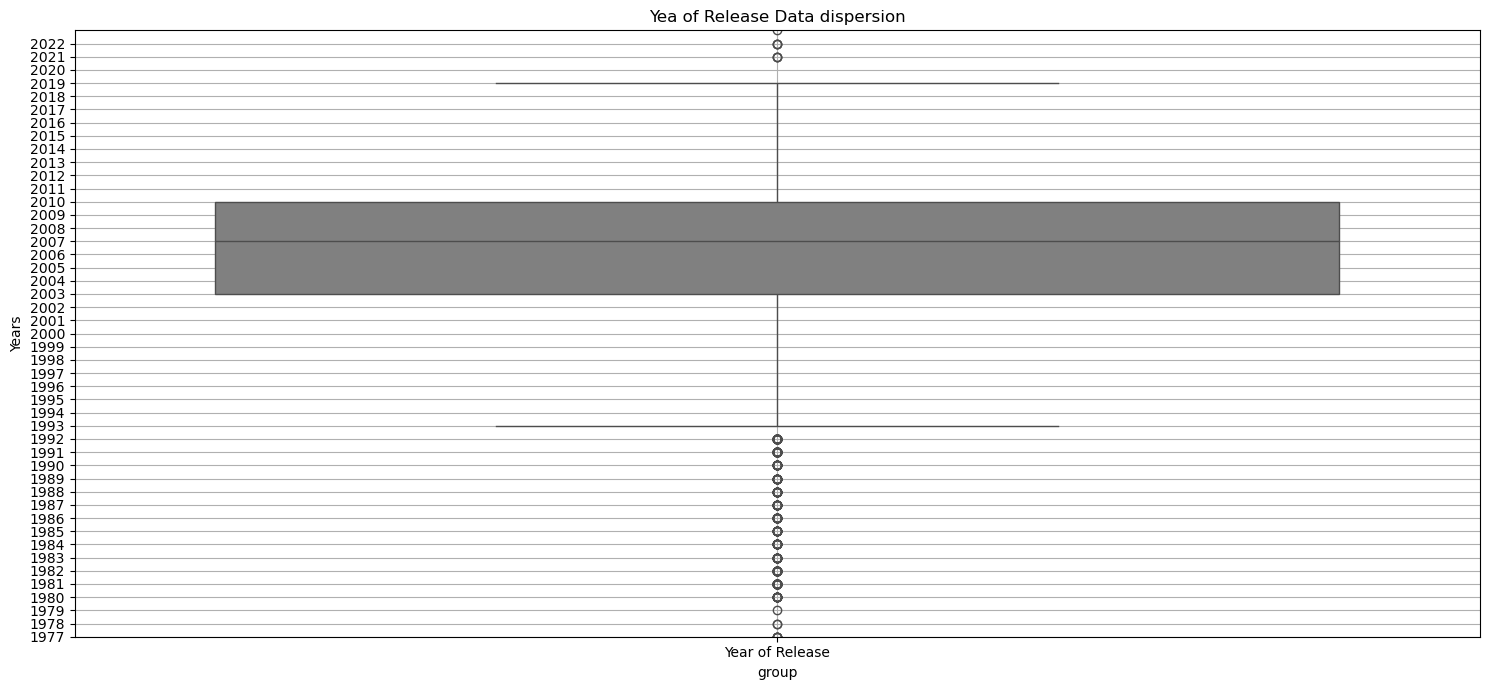

In [32]:
# Year of Release data dispersion
plot_boxplots(ds_list=[df_vg['year_of_release']], xlabels=['Year of Release'], ylabel='Years',
              title='Yea of Release Data dispersion', yticks_range=(1977, 2023, 1), rotation=0, color=['grey'])

3.3.2 Data dispersion and outliers for 'na_sales'

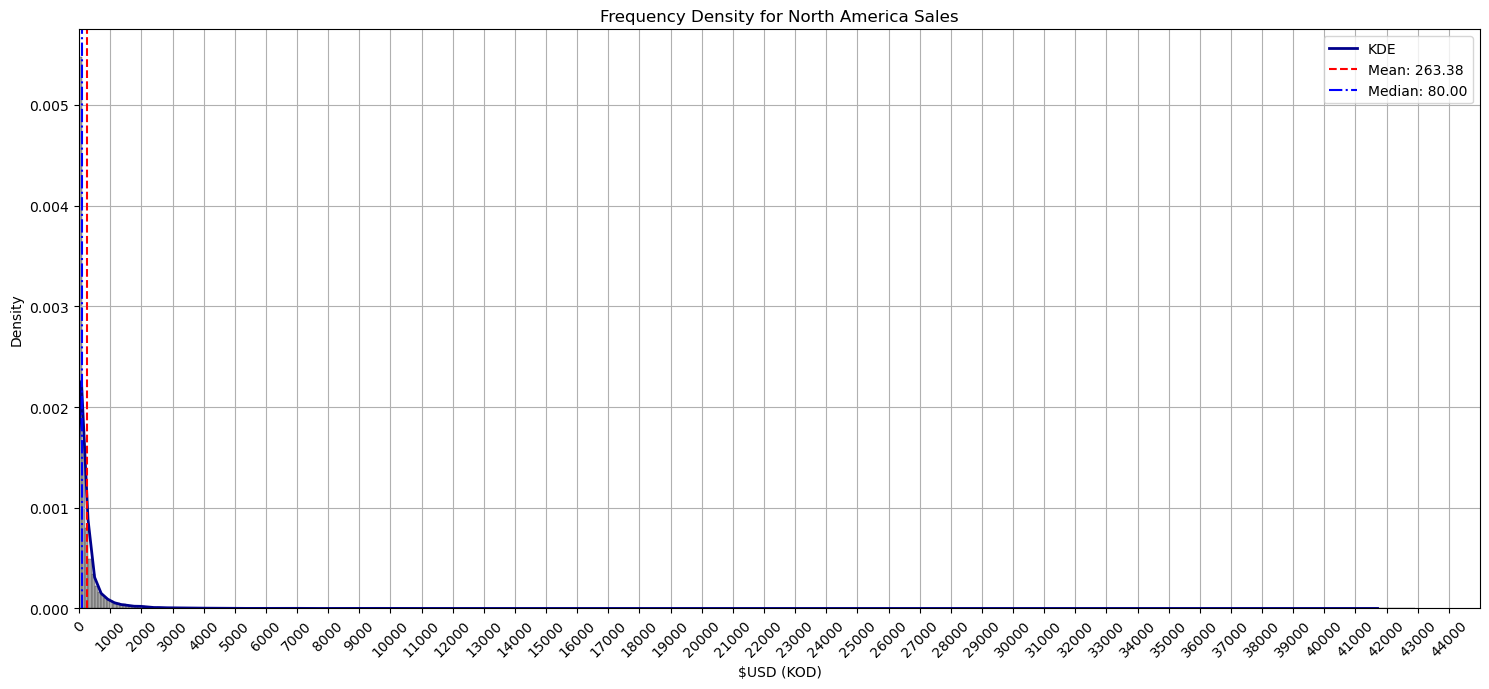

In [33]:
# NA Sales Distribution Frequency and Frequency density
plot_frequency_density(df_vg['na_sales'], bins=range(0, 43000, 100), color='grey', title='Frequency Density for North America Sales', 
                       xlabel='$USD (KOD)', ylabel='Density', xticks_range=(0, 45000, 1000), rotation=45, show_kde=True)

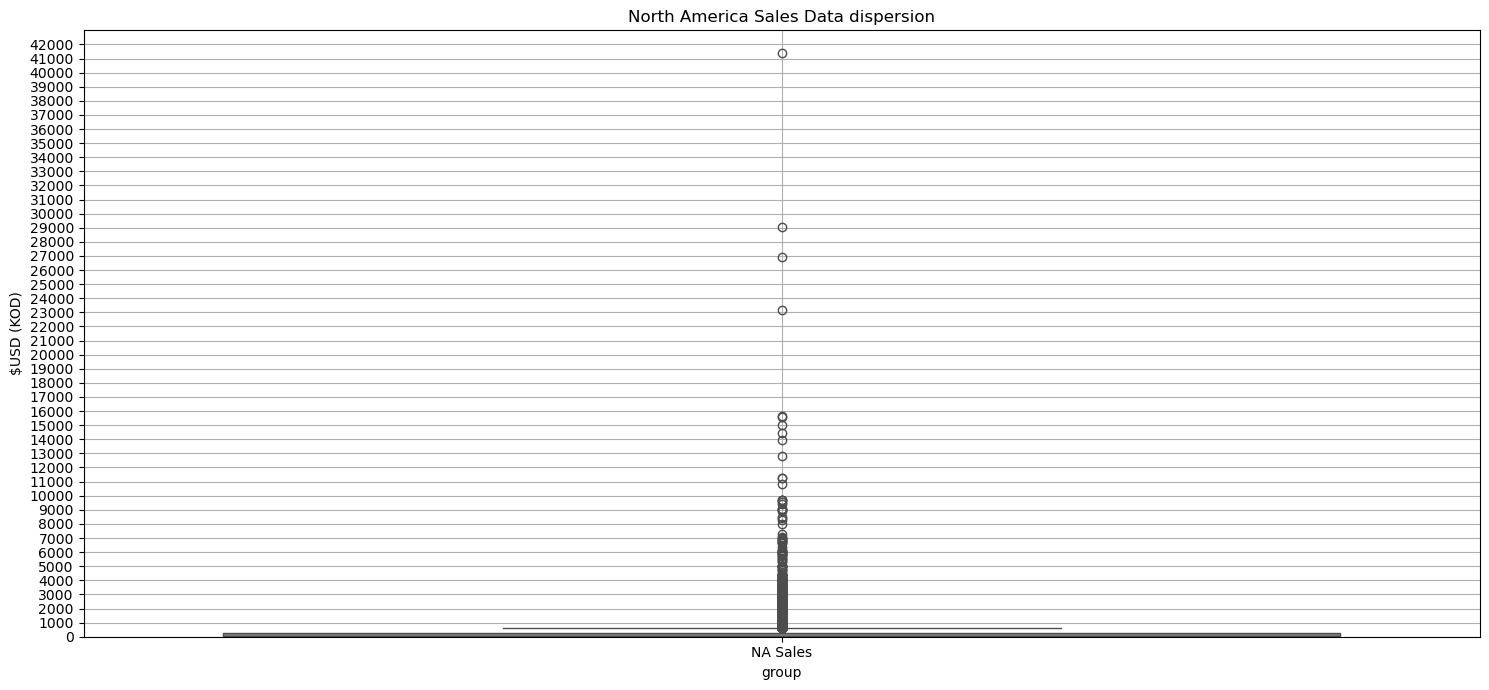

In [34]:
# NA Sales data dispersion
plot_boxplots(ds_list=[df_vg['na_sales']], xlabels=['NA Sales'], ylabel='$USD (KOD)',
              title='North America Sales Data dispersion', yticks_range=(0, 43000, 1000),  rotation=0, color=['grey'])

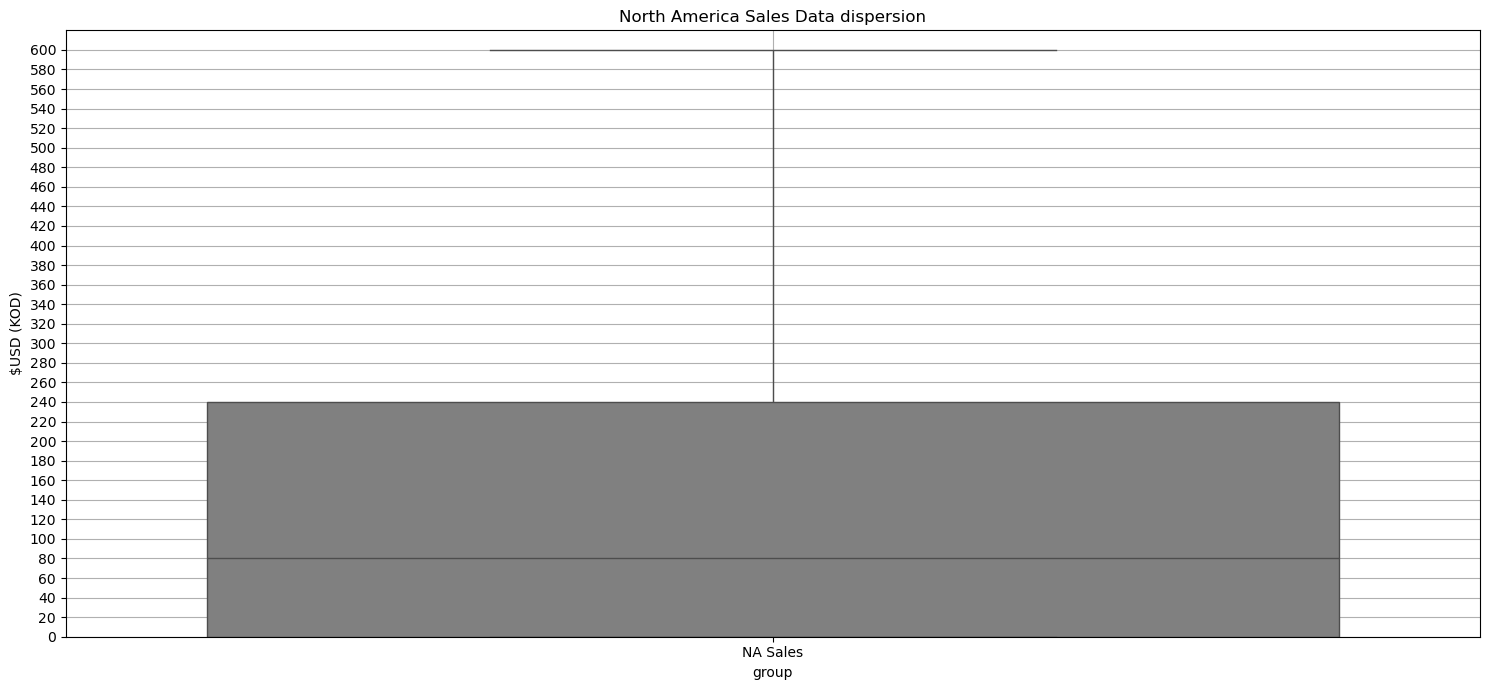

In [35]:
plot_boxplots(ds_list=[df_vg['na_sales']], xlabels=['NA Sales'], ylabel='$USD (KOD)',
              title='North America Sales Data dispersion', yticks_range=(0, 620, 20), rotation=0, color=['grey'], showfliers=False)

3.3.3 Data dispersion and outliers for 'eu_sales'

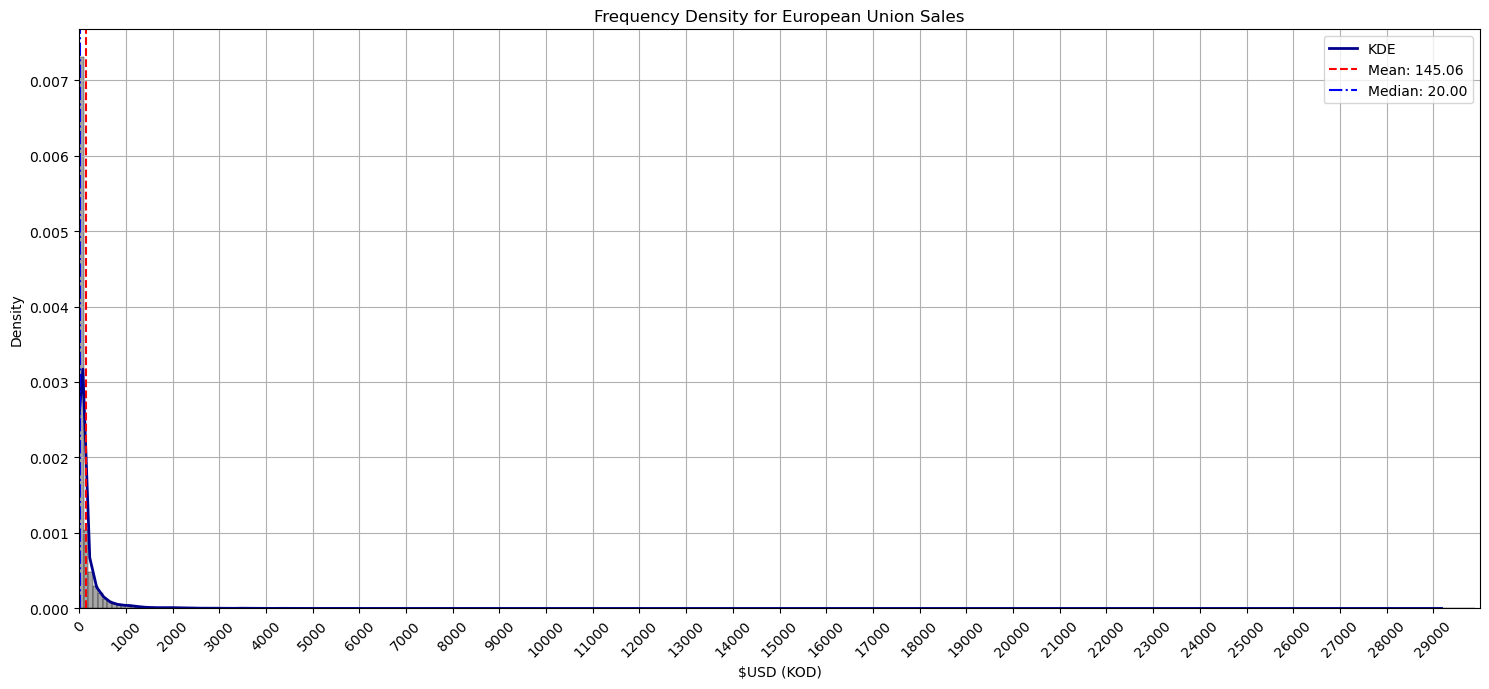

In [36]:
# EU Sales Distribution Frequency and Frequency density
plot_frequency_density(df_vg['eu_sales'], bins=range(0, 30000, 100), color='grey', title='Frequency Density for European Union Sales', 
                       xlabel='$USD (KOD)', xticks_range=(0, 30000, 1000),  ylabel='Density', rotation=45, show_kde=True)

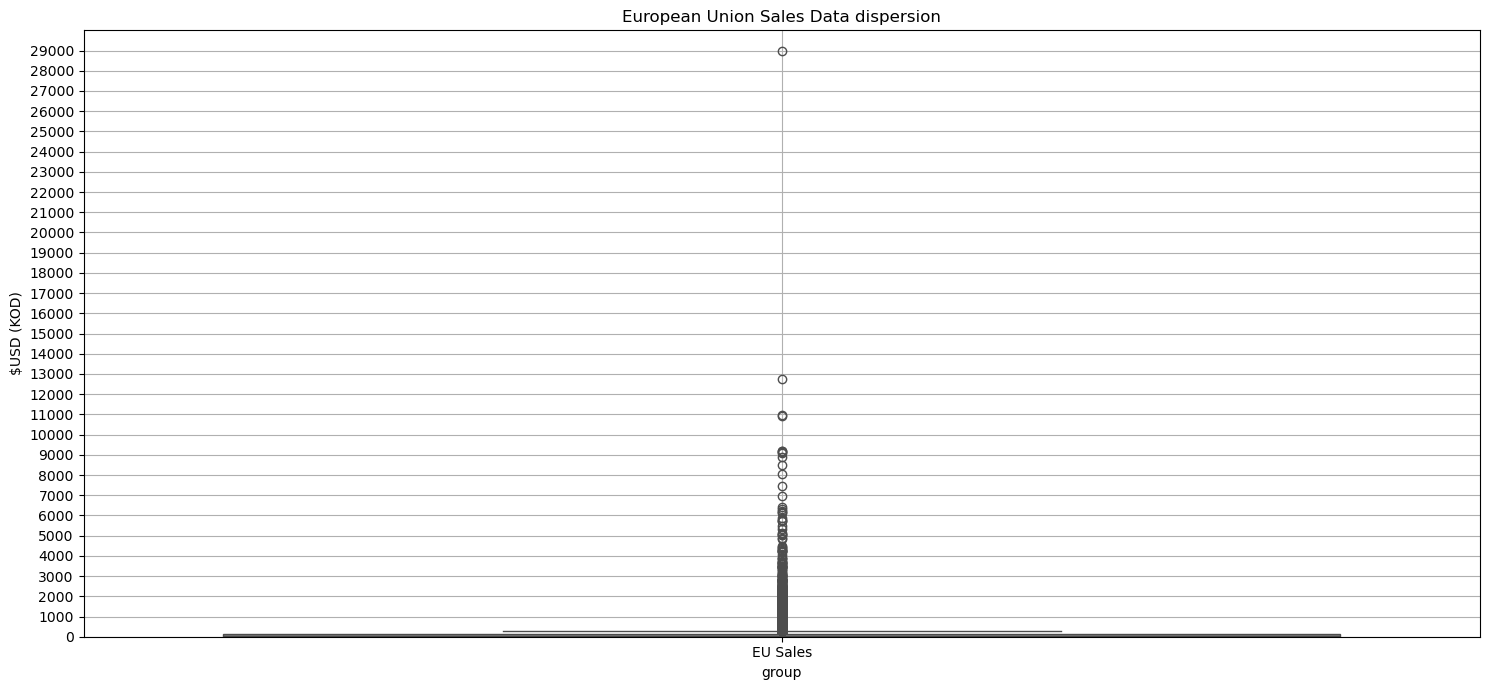

In [37]:
# EU Sales data dispersion
plot_boxplots(ds_list=[df_vg['eu_sales']], xlabels=['EU Sales'], ylabel='$USD (KOD)',
              title='European Union Sales Data dispersion', yticks_range=(0, 30000, 1000),  rotation=0, color=['grey'])

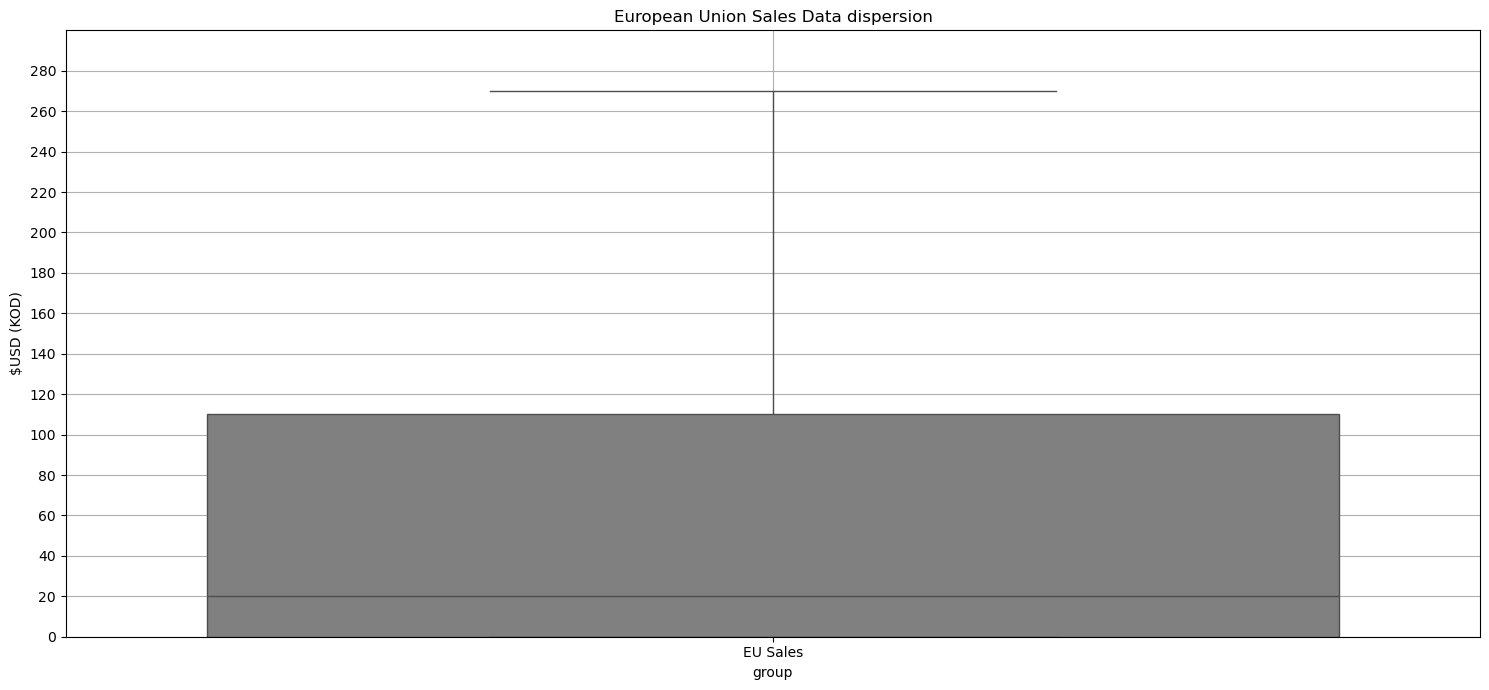

In [38]:
plot_boxplots(ds_list=[df_vg['eu_sales']], xlabels=['EU Sales'], ylabel='$USD (KOD)',
              title='European Union Sales Data dispersion', yticks_range=(0, 300, 20), rotation=0, color=['grey'], showfliers=False)

3.3.4 Data dispersion and outliers for 'jp_sales'

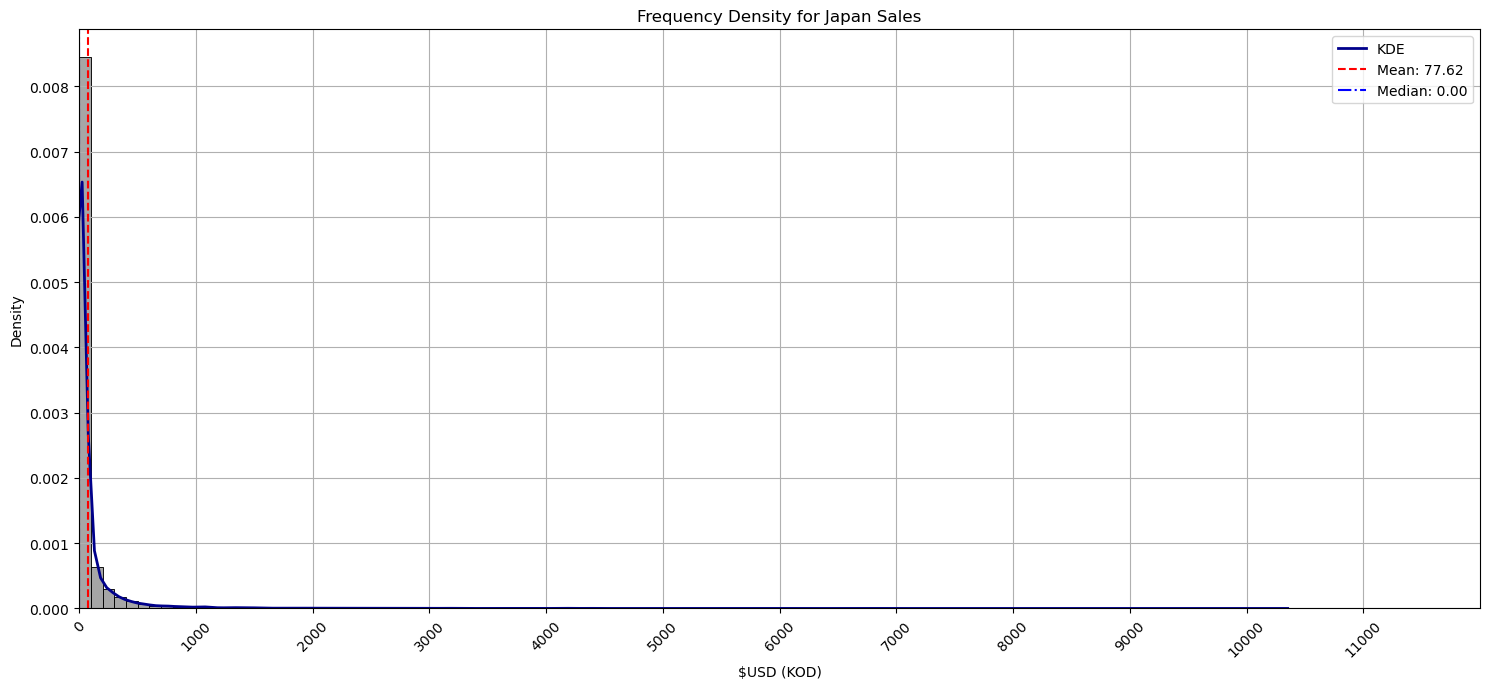

In [39]:
# JP Sales Distribution Frequency and Frequency density
plot_frequency_density(df_vg['jp_sales'], bins=range(0, 12000, 100), color='grey', title='Frequency Density for Japan Sales', 
                       xlabel='$USD (KOD)', xticks_range=(0, 12000, 1000), ylabel='Density', rotation=45, show_kde=True)

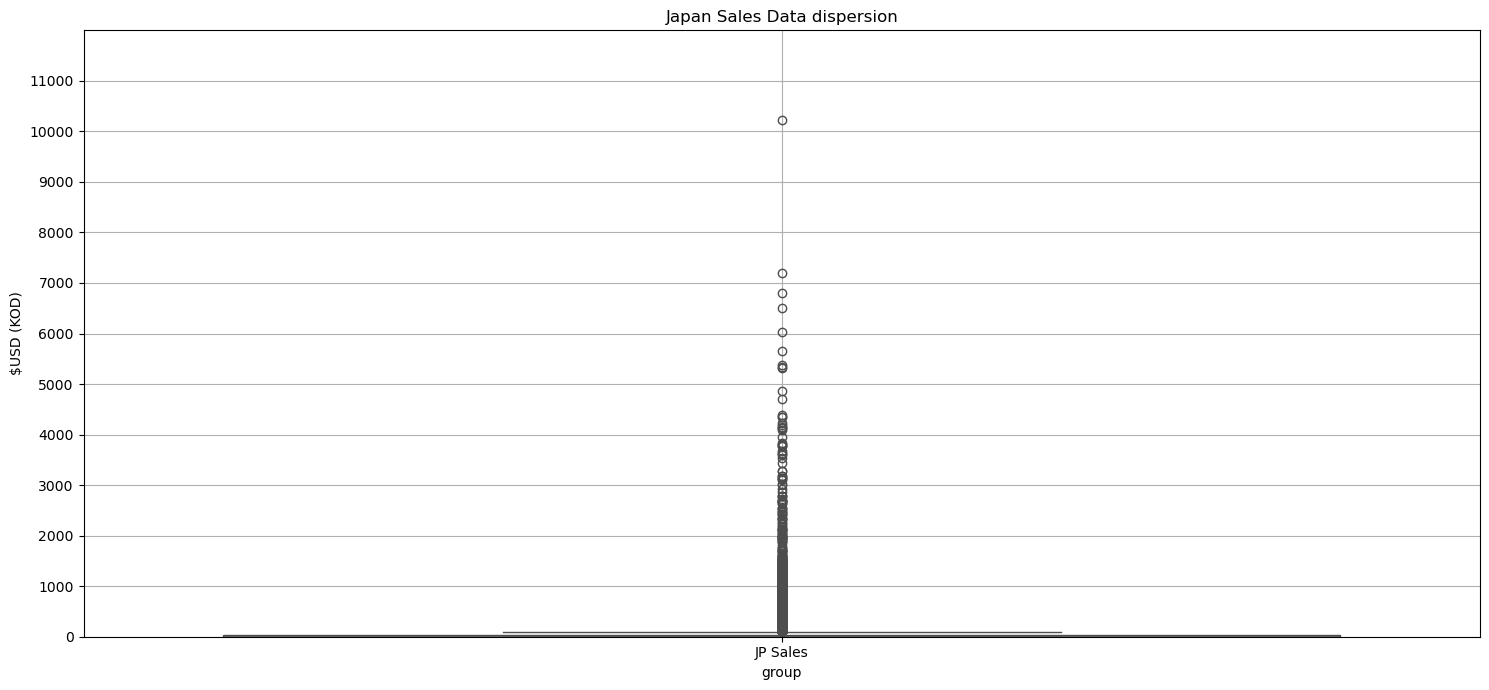

In [40]:
# JP Sales data dispersion
plot_boxplots(ds_list=[df_vg['jp_sales']], xlabels=['JP Sales'], ylabel='$USD (KOD)',
              title='Japan Sales Data dispersion', yticks_range=(0, 12000, 1000),  rotation=0, color=['grey'])

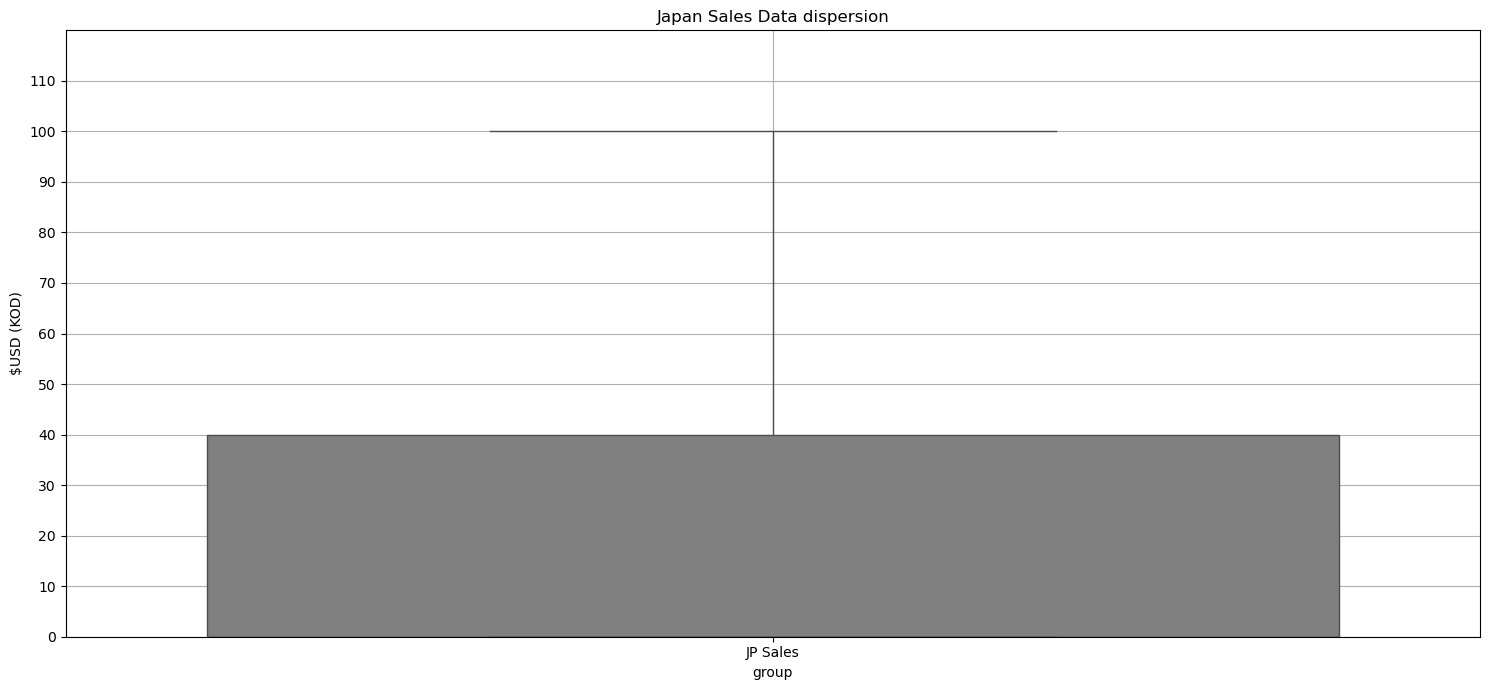

In [41]:
plot_boxplots(ds_list=[df_vg['jp_sales']], xlabels=['JP Sales'], ylabel='$USD (KOD)',
              title='Japan Sales Data dispersion', yticks_range=(0, 120, 10), rotation=0, color=['grey'], showfliers=False)

3.3.5 Data dispersion and outliers for 'other_sales'

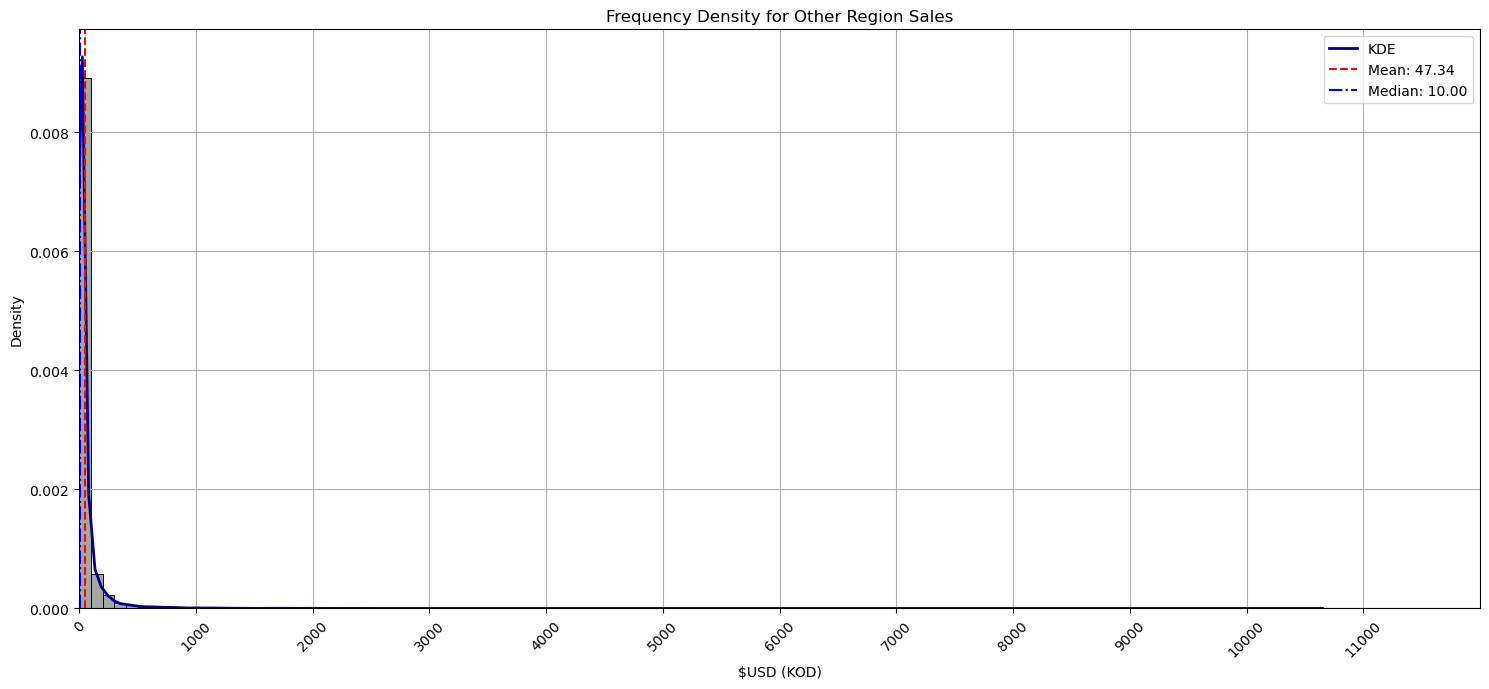

In [42]:
# Other Sales Distribution Frequency and Frequency density
plot_frequency_density(df_vg['other_sales'], bins=range(0, 12000, 100), color='grey', title='Frequency Density for Other Region Sales', 
                       xlabel='$USD (KOD)', xticks_range=(0, 12000, 1000), ylabel='Density', rotation=45, show_kde=True)

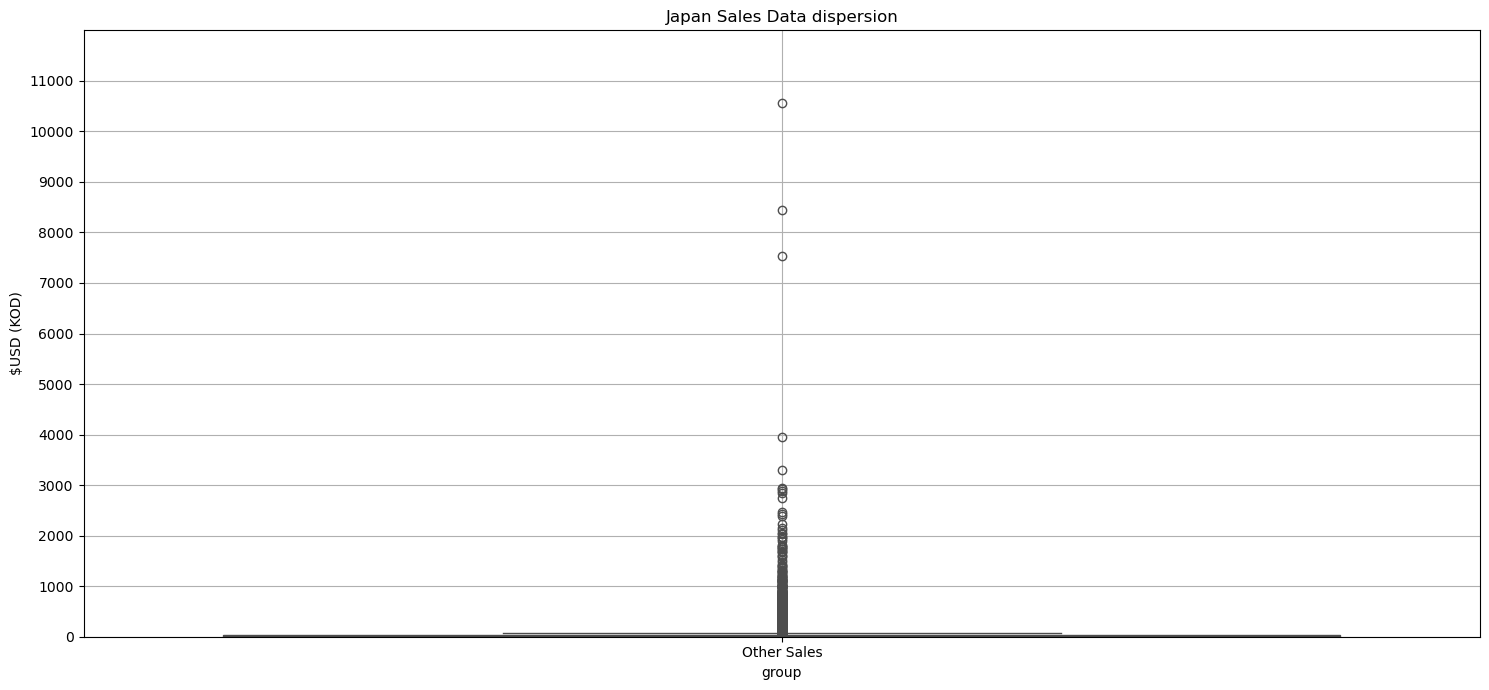

In [43]:
# Other Sales data dispersion
plot_boxplots(ds_list=[df_vg['other_sales']], xlabels=['Other Sales'], ylabel='$USD (KOD)',
              title='Japan Sales Data dispersion', yticks_range=(0, 12000, 1000),  rotation=0, color=['grey'])

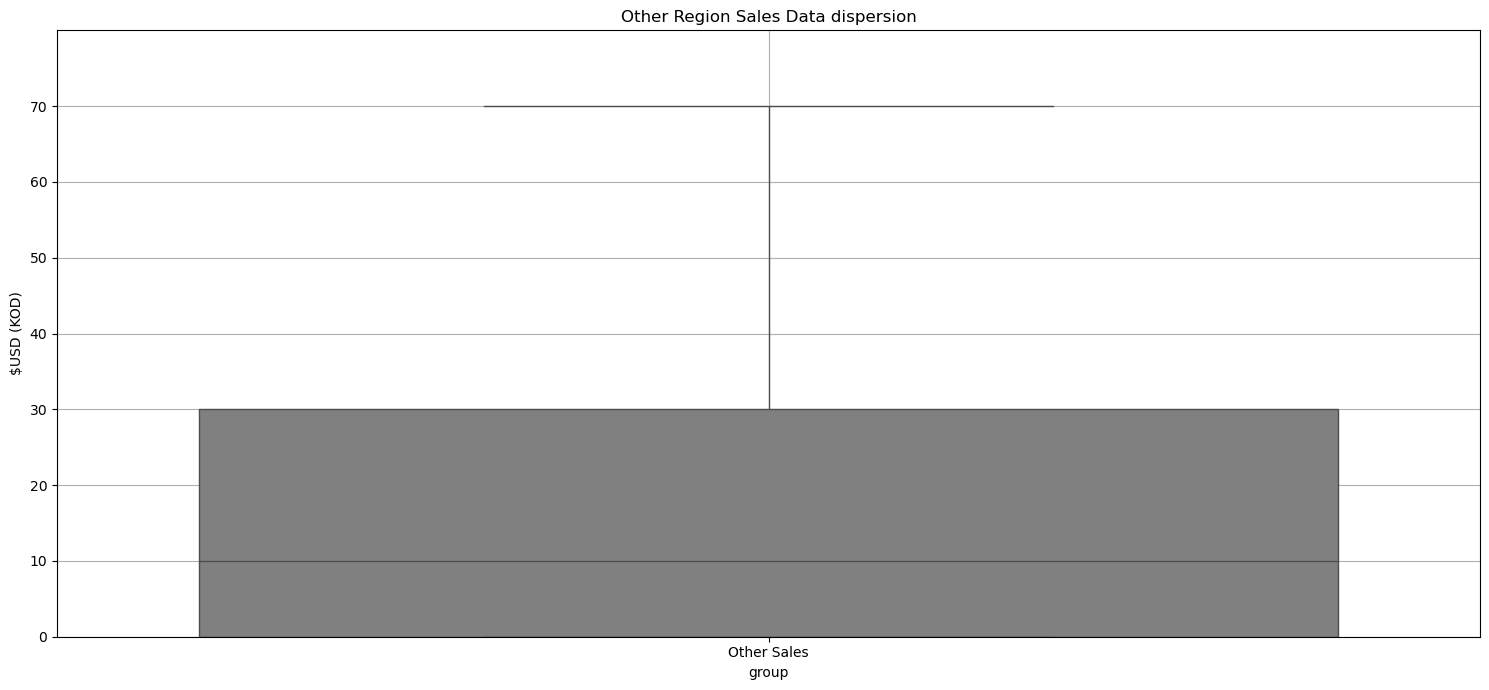

In [44]:
plot_boxplots(ds_list=[df_vg['other_sales']], xlabels=['Other Sales'], ylabel='$USD (KOD)',
              title='Other Region Sales Data dispersion', yticks_range=(0, 80, 10), rotation=0, color=['grey'], showfliers=False)

3.3.6 Data dispersion and outliers for 'critic_score'

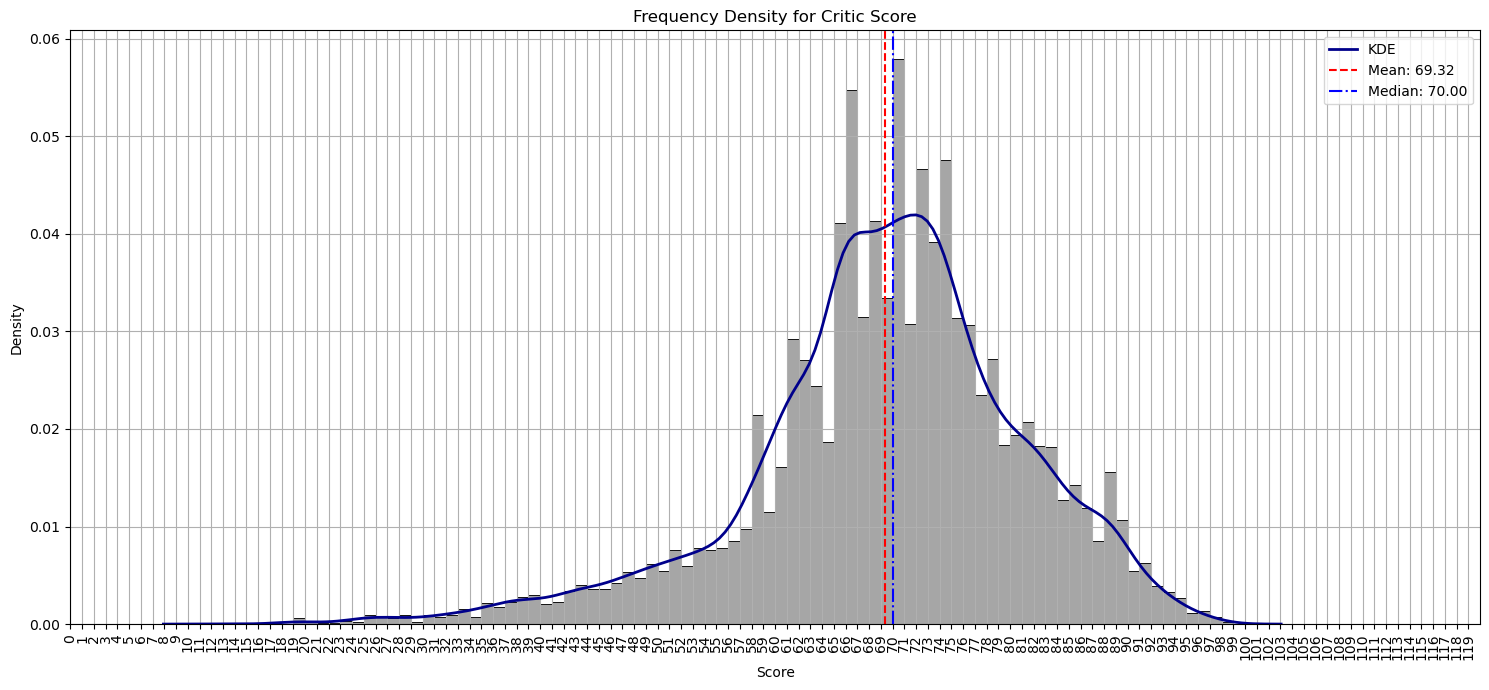

In [45]:
# Critic Score Distribution Frequency and Frequency density
plot_frequency_density(df_vg['critic_score'], bins=range(0, 120, 1), color='grey', title='Frequency Density for Critic Score', 
                       xlabel='Score', xticks_range=(0, 120, 1), ylabel='Density', rotation=90, show_kde=True)

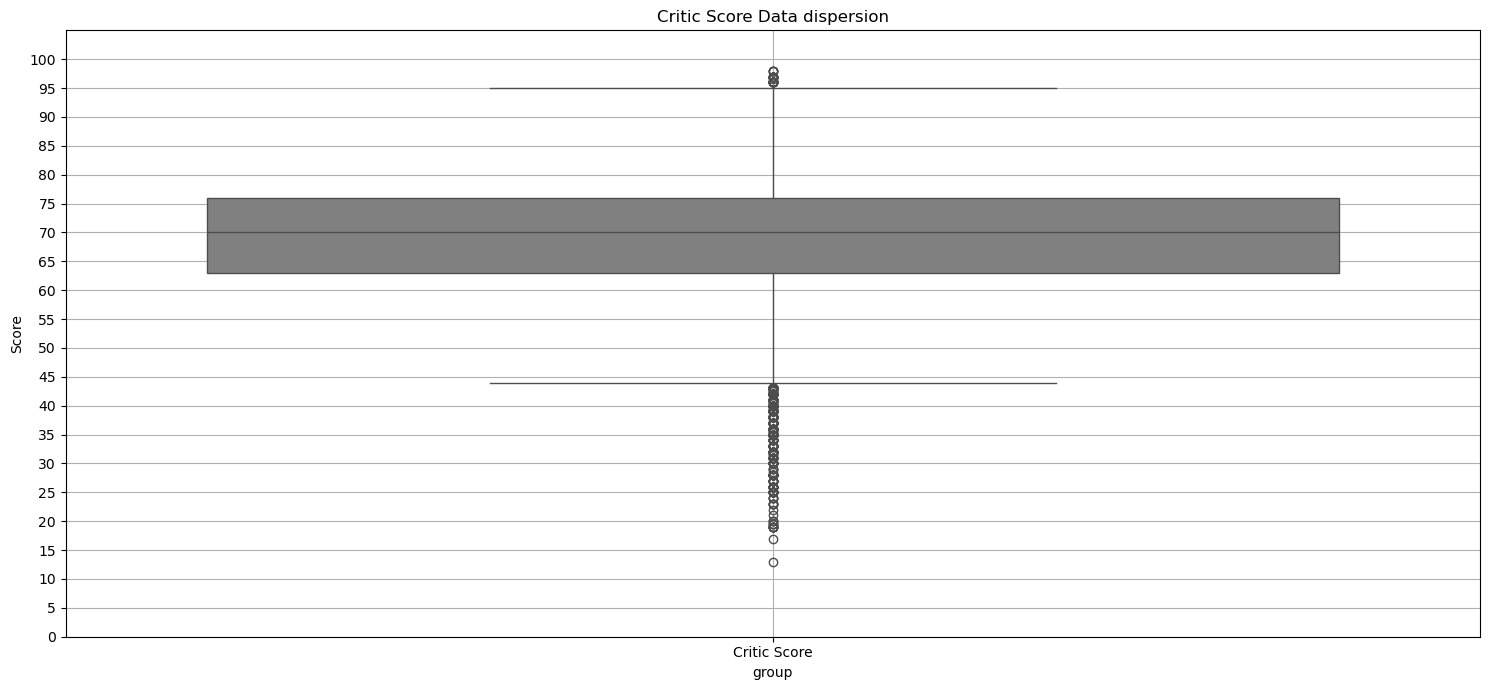

In [46]:
# Critic Score data dispersion
plot_boxplots(ds_list=[df_vg['critic_score']], xlabels=['Critic Score'], ylabel='Score',
              title='Critic Score Data dispersion', yticks_range=(0, 105, 5), rotation=0, color=['grey'])

3.3.7 Data dispersion and outliers for 'user_score'

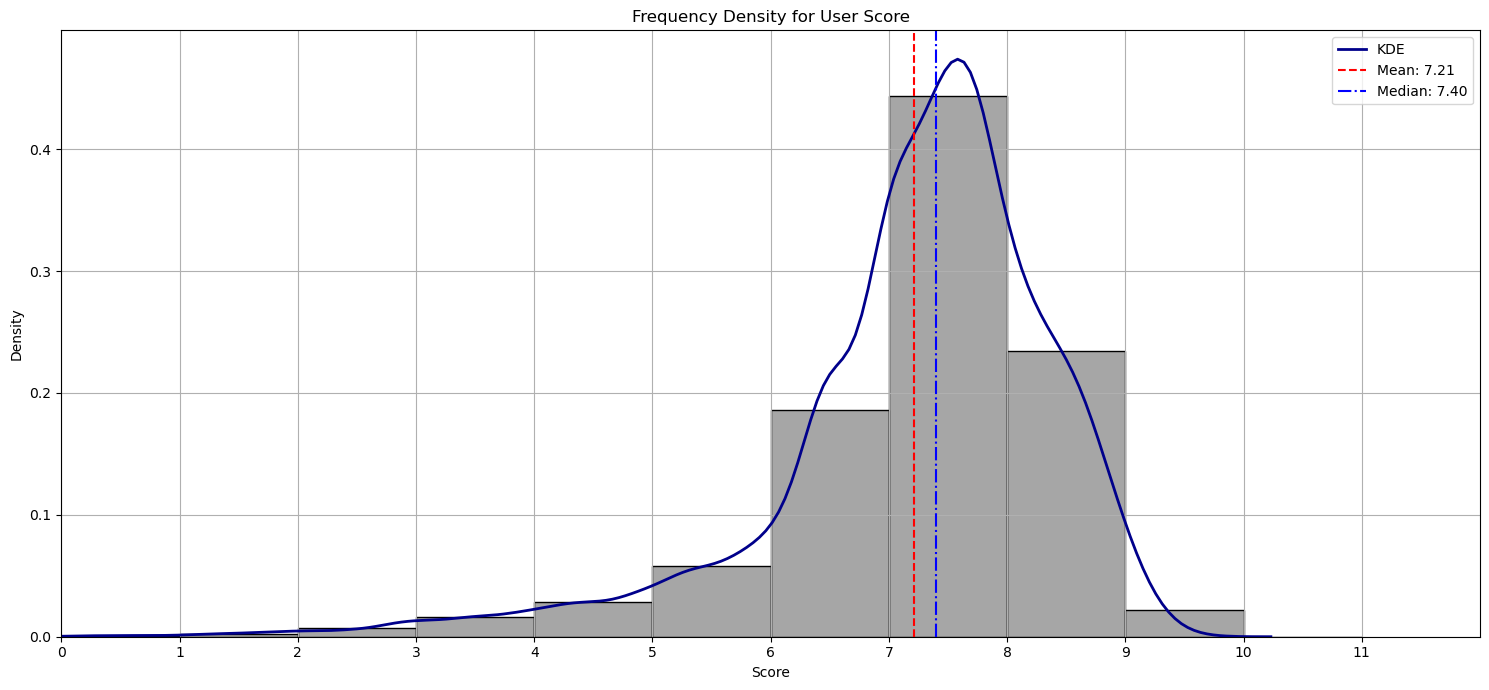

In [47]:
# User Score Distribution Frequency and Frequency density
plot_frequency_density(df_vg['user_score'], bins=range(0, 12, 1), color='grey', title='Frequency Density for User Score', 
                       xlabel='Score', xticks_range=(0, 12, 1), ylabel='Density', rotation=0, show_kde=True)

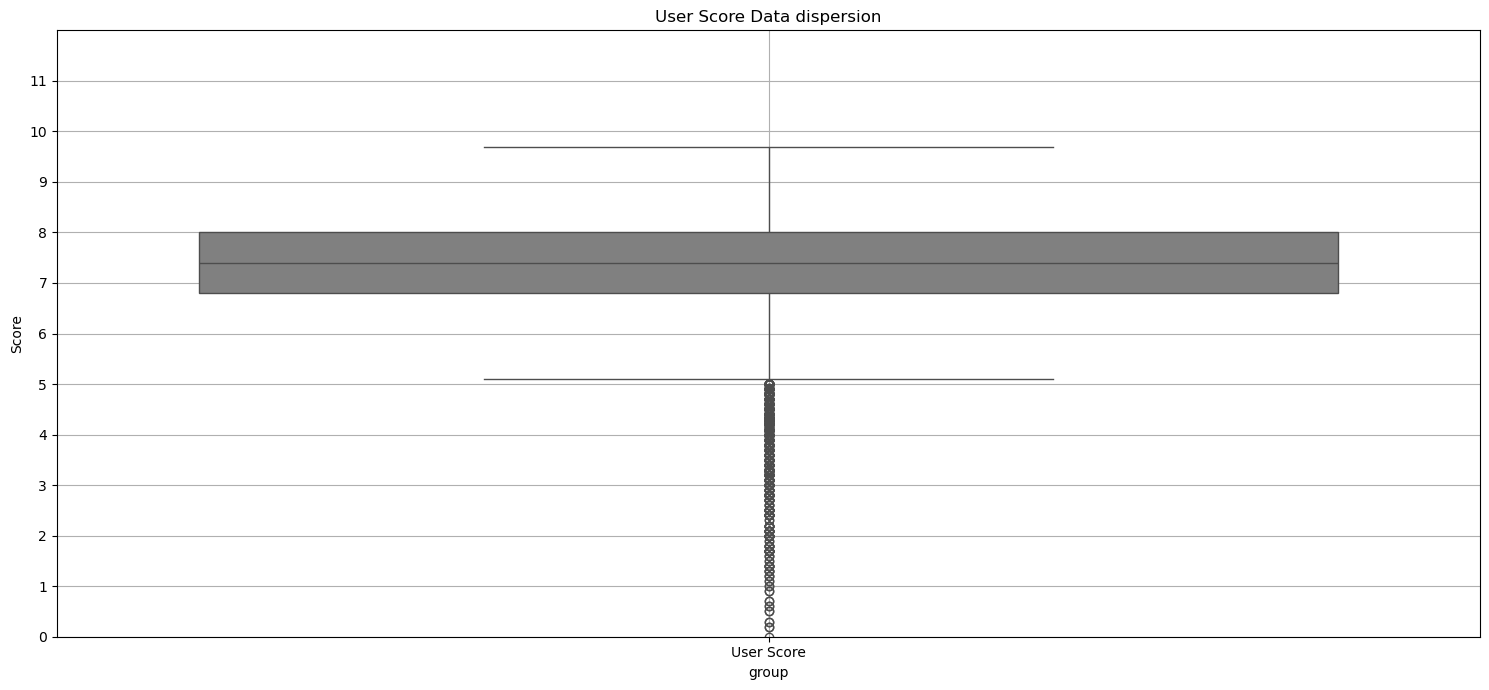

In [48]:
# User Score data dispersion
plot_boxplots(ds_list=[df_vg['user_score']], xlabels=['User Score'], ylabel='Score',
              title='User Score Data dispersion', yticks_range=(0, 12, 1), rotation=0, color=['grey'])

#### 3.4 Data visualization for video games

##### 3.4.1 Data visualization for Games amount released by years

In [49]:
# Plots for how many games were released in different years
ds_games_year = df_vg.groupby('year_of_release')['name'].count().reset_index()
ds_games_year.columns = ['year_of_release', 'games_released']
ds_games_year

,year_of_release,games_released
0,1977.0,5
1,1978.0,2
2,1979.0,1
3,1980.0,14
4,1981.0,48
...,...,...
40,2017.0,2
41,2019.0,1
42,2021.0,3
43,2022.0,3


c:\Users\luisp\OneDrive\Documentos\GitHub\P_20250529_Videogames_analysis\src\eda.py:495: UserWarning: 
The palette list has fewer values (2) than needed (37) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=ds, x=x_col, y=y_col, hue=hue_col, palette=strong_palette, alpha=alpha)


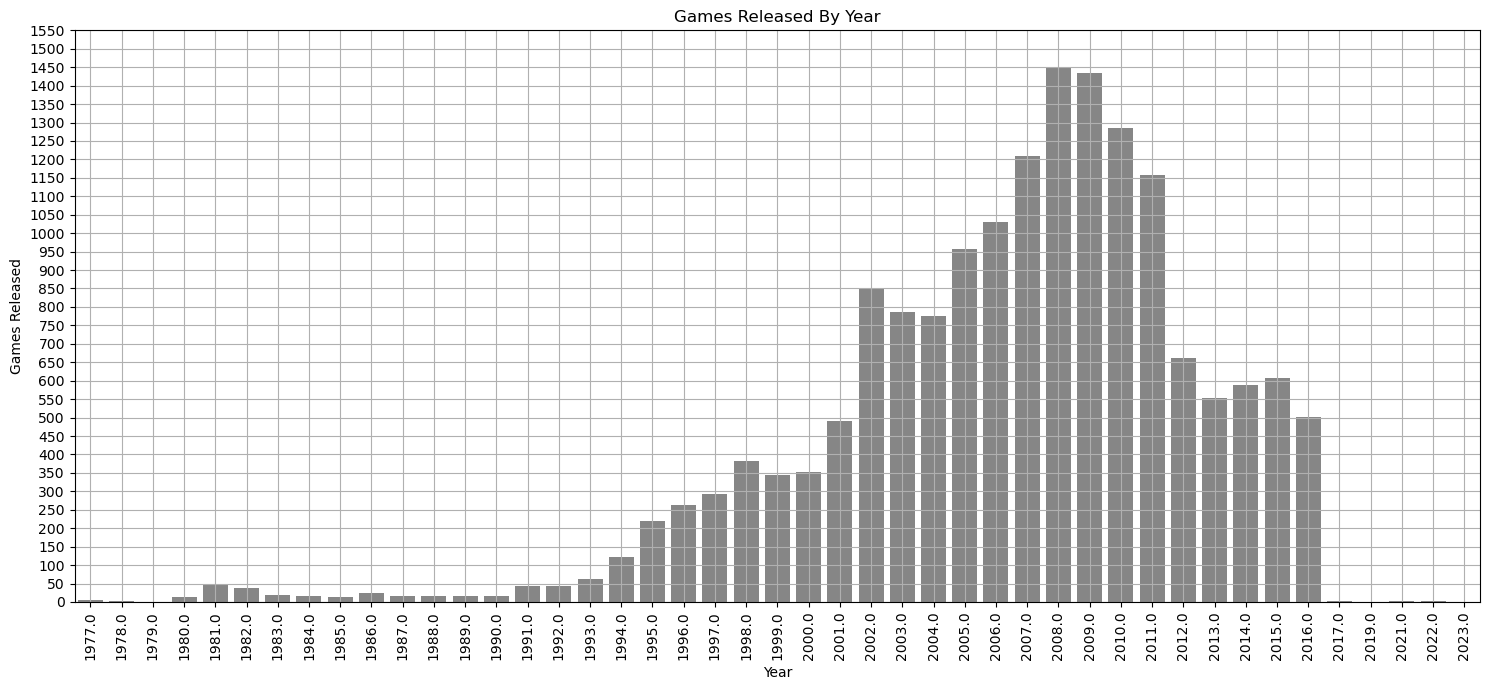

In [50]:
plot_grouped_barplot(ds_games_year, x_col='year_of_release', y_col='games_released', hue_col='games_released', palette=['grey'],
                     title='Games Released By Year', xlabel='Year', ylabel='Games Released',
                     yticks_range=range(0, 1600, 50), x_rotation=90, show_legend=False)

##### 3.4.2 Data visualization for Sales variation by platform

3.4.2.1 Data visualization for Platform Sales in North America

In [1]:
# Platform Sales in North America
df_vg_platform_na = df_vg_platform_sales.loc[:, ['platform', 'na_sales']].sort_values(by='na_sales', ascending=False)
plot_grouped_barplot(df_vg_platform_na, x_col='platform', y_col='na_sales', hue_col='platform', palette=['grey'],
                     title='Platform Sales in North America', xlabel='Platform', ylabel='$USD (KOD)',
                      x_rotation=0)

NameError: name 'df_vg_platform_sales' is not defined

3.4.2.2 Data visualization for Platform Sales in European Union

c:\Users\luisp\OneDrive\Documentos\GitHub\P_20250529_Videogames_analysis\src\eda.py:495: UserWarning: 
The palette list has fewer values (2) than needed (31) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=ds, x=x_col, y=y_col, hue=hue_col, palette=strong_palette, alpha=alpha)


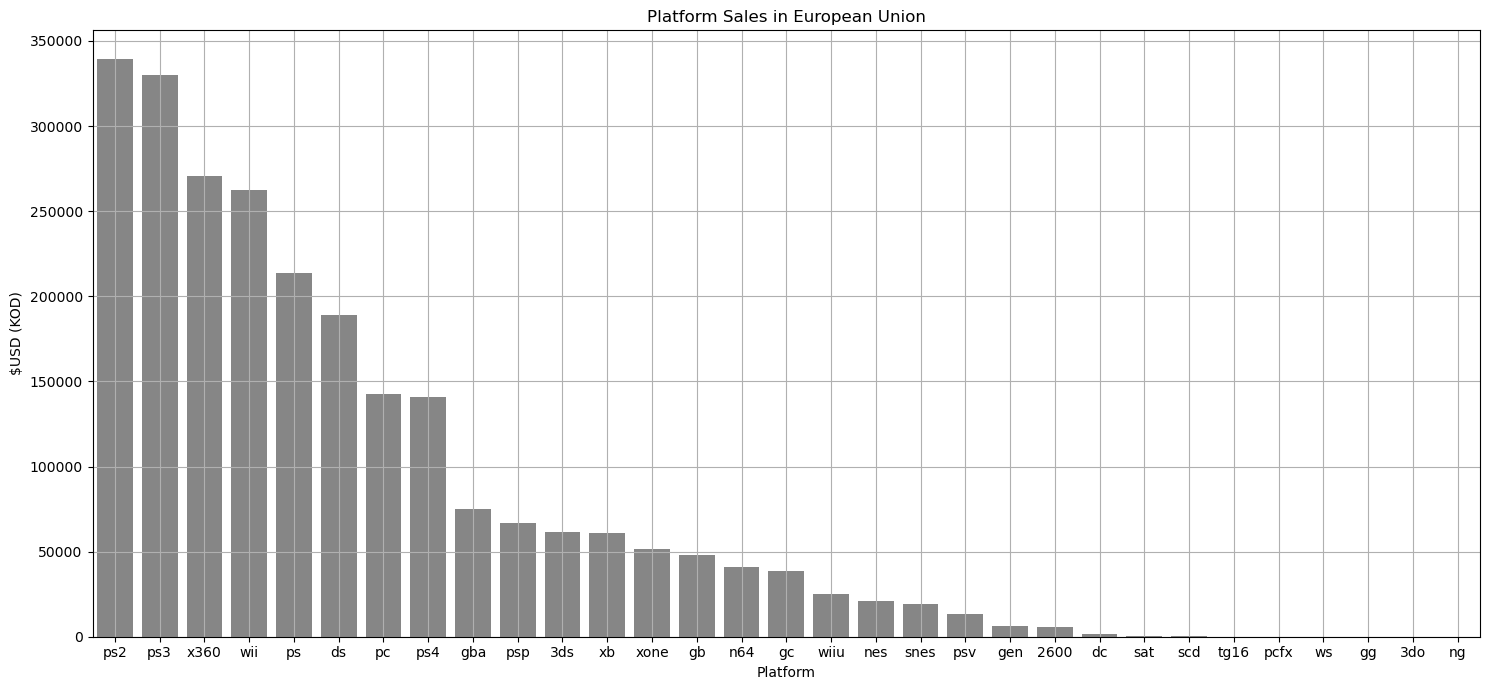

In [ ]:
# Platform Sales in European Union
df_vg_platform_eu = df_vg_platform_sales.loc[:, ['platform', 'eu_sales']].sort_values(by='eu_sales', ascending=False)
plot_grouped_barplot(df_vg_platform_eu, x_col='platform', y_col='eu_sales', hue_col='platform', palette=['grey'],
                     title='Platform Sales in European Union', xlabel='Platform', ylabel='$USD (KOD)',
                      x_rotation=0)

3.4.2.3 Data visualization for Platform Sales in Japan

c:\Users\luisp\OneDrive\Documentos\GitHub\P_20250529_Videogames_analysis\src\eda.py:495: UserWarning: 
The palette list has fewer values (2) than needed (31) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=ds, x=x_col, y=y_col, hue=hue_col, palette=strong_palette, alpha=alpha)


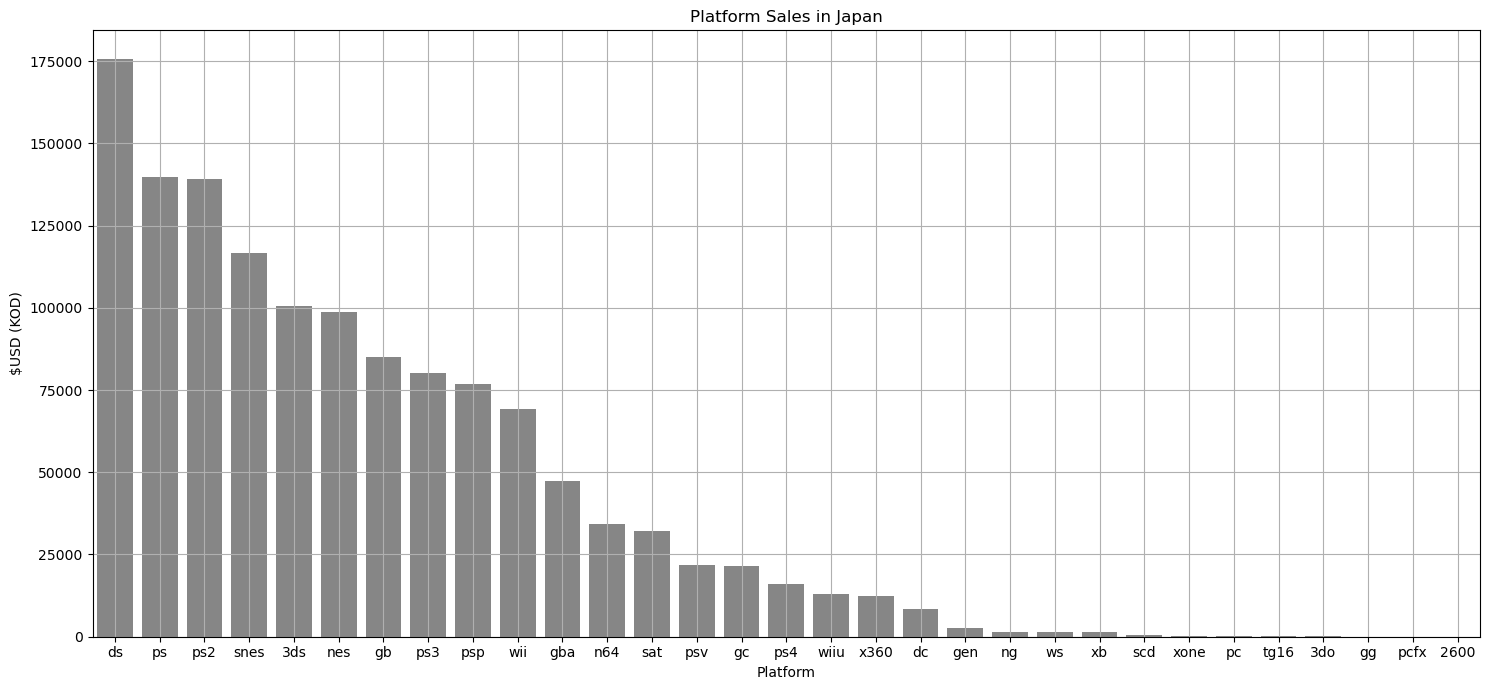

In [ ]:
# Platform Sales in Japan
df_vg_platform_jp = df_vg_platform_sales.loc[:, ['platform', 'jp_sales']].sort_values(by='jp_sales', ascending=False)
plot_grouped_barplot(df_vg_platform_jp, x_col='platform', y_col='jp_sales', hue_col='platform', palette=['grey'],
                     title='Platform Sales in Japan', xlabel='Platform', ylabel='$USD (KOD)',
                      x_rotation=0)

3.4.2.4 Data visualization for Platform Sales in Other Region

c:\Users\luisp\OneDrive\Documentos\GitHub\P_20250529_Videogames_analysis\src\eda.py:495: UserWarning: 
The palette list has fewer values (2) than needed (31) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=ds, x=x_col, y=y_col, hue=hue_col, palette=strong_palette, alpha=alpha)


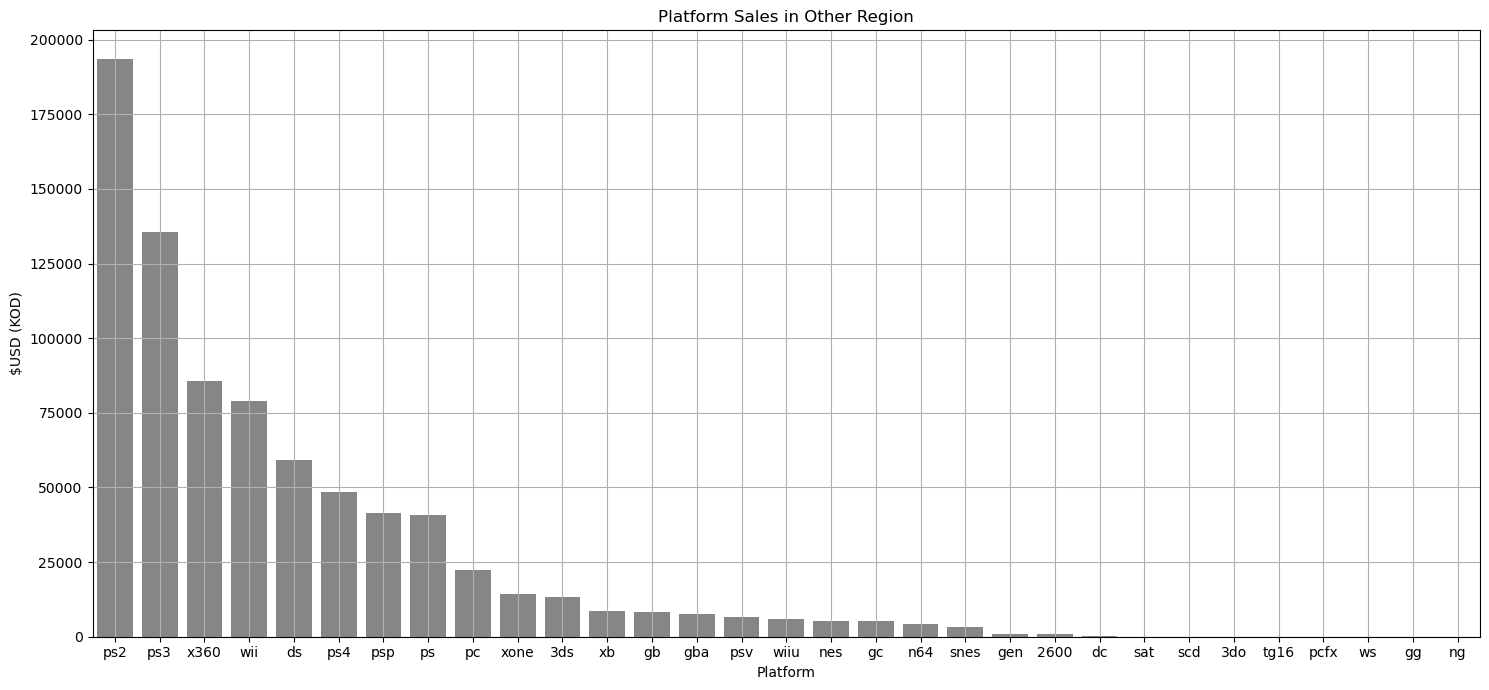

In [ ]:
# Platform Sales in Other Region
df_vg_platform_other = df_vg_platform_sales.loc[:, ['platform', 'other_sales']].sort_values(by='other_sales', ascending=False)
plot_grouped_barplot(df_vg_platform_other, x_col='platform', y_col='other_sales', hue_col='platform', palette=['grey'],
                     title='Platform Sales in Other Region', xlabel='Platform', ylabel='$USD (KOD)',
                      x_rotation=0)

3.4.2.5 Data visualization for Platform Total Sales

c:\Users\luisp\OneDrive\Documentos\GitHub\P_20250529_Videogames_analysis\src\eda.py:495: UserWarning: 
The palette list has fewer values (2) than needed (31) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=ds, x=x_col, y=y_col, hue=hue_col, palette=strong_palette, alpha=alpha)


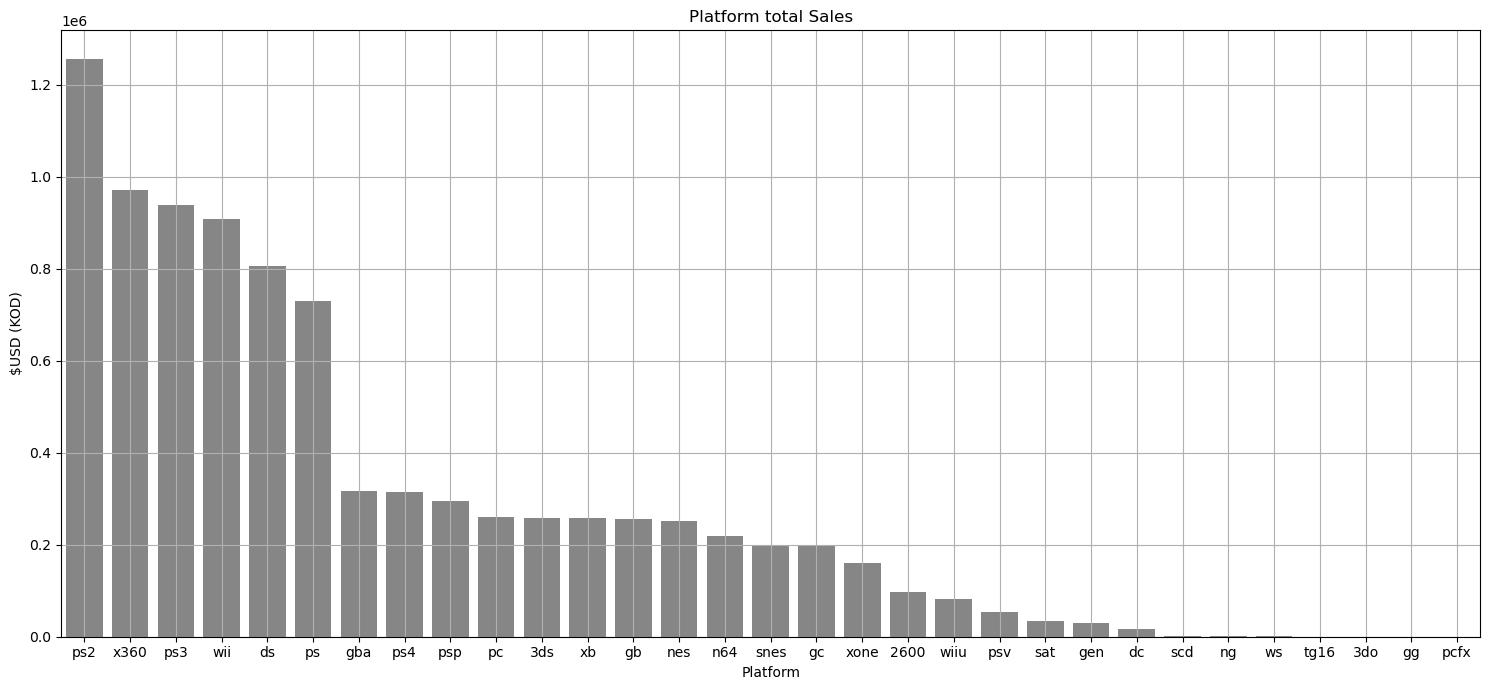

In [ ]:
# Platform Total Sales
df_vg_platform_total = df_vg_platform_sales.loc[:, ['platform', 'total_sales']].sort_values(by='total_sales', ascending=False)
plot_grouped_barplot(df_vg_platform_total, x_col='platform', y_col='total_sales', hue_col='platform', palette=['grey'],
                     title='Platform total Sales', xlabel='Platform', ylabel='$USD (KOD)',
                      x_rotation=0)

##### 3.4.3 Data visualization for Platforms highest total sales per year.

In [56]:
# Platform highest total sales per year
# Step 1: Group by platform and year to get total sales
df_vg_platform_year_sales = df_vg_platform_top_sales_year.groupby(['year_of_release', 'platform'], as_index=False)['total_sales'].sum()
df_vg_platform_year_sales

,year_of_release,platform,total_sales
0,1983.0,nes,10960.0
1,1984.0,nes,50080.0
2,1985.0,nes,53440.0
3,1986.0,nes,36410.0
4,1987.0,nes,19760.0
...,...,...,...
158,2016.0,ps3,3600.0
159,2016.0,ps4,69250.0
160,2016.0,psv,4250.0
161,2016.0,wiiu,4600.0


In [57]:
# Step 2: For each year, find the platform with the max total_sales
idx = df_vg_platform_year_sales.groupby('year_of_release')['total_sales'].idxmax() # grabs the index of the row with the maximum value.
idx.name = 'index'
idx

year_of_release
1983.0      0
1984.0      1
1985.0      2
1986.0      3
1987.0      4
         ... 
2012.0    129
2013.0    136
2014.0    146
2015.0    153
2016.0    159
Name: index, Length: 34, dtype: int64

In [58]:
df_vg_platform_year_top_sales = df_vg_platform_year_sales.loc[idx].sort_values('year_of_release')
df_vg_platform_year_top_sales

,year_of_release,platform,total_sales
0,1983.0,nes,10960.0
1,1984.0,nes,50080.0
2,1985.0,nes,53440.0
3,1986.0,nes,36410.0
4,1987.0,nes,19760.0
...,...,...,...
129,2012.0,ps3,107430.0
136,2013.0,ps3,113300.0
146,2014.0,ps4,100000.0
153,2015.0,ps4,118900.0


In [59]:
ds_vg_platform_year_top_sales = df_vg_platform_year_top_sales.set_index(['year_of_release', 'platform'])['total_sales']
ds_vg_platform_year_top_sales

year_of_release  platform
1983.0           nes          10960.0
1984.0           nes          50080.0
1985.0           nes          53440.0
1986.0           nes          36410.0
1987.0           nes          19760.0
                               ...   
2012.0           ps3         107430.0
2013.0           ps3         113300.0
2014.0           ps4         100000.0
2015.0           ps4         118900.0
2016.0           ps4          69250.0
Name: total_sales, Length: 34, dtype: float64

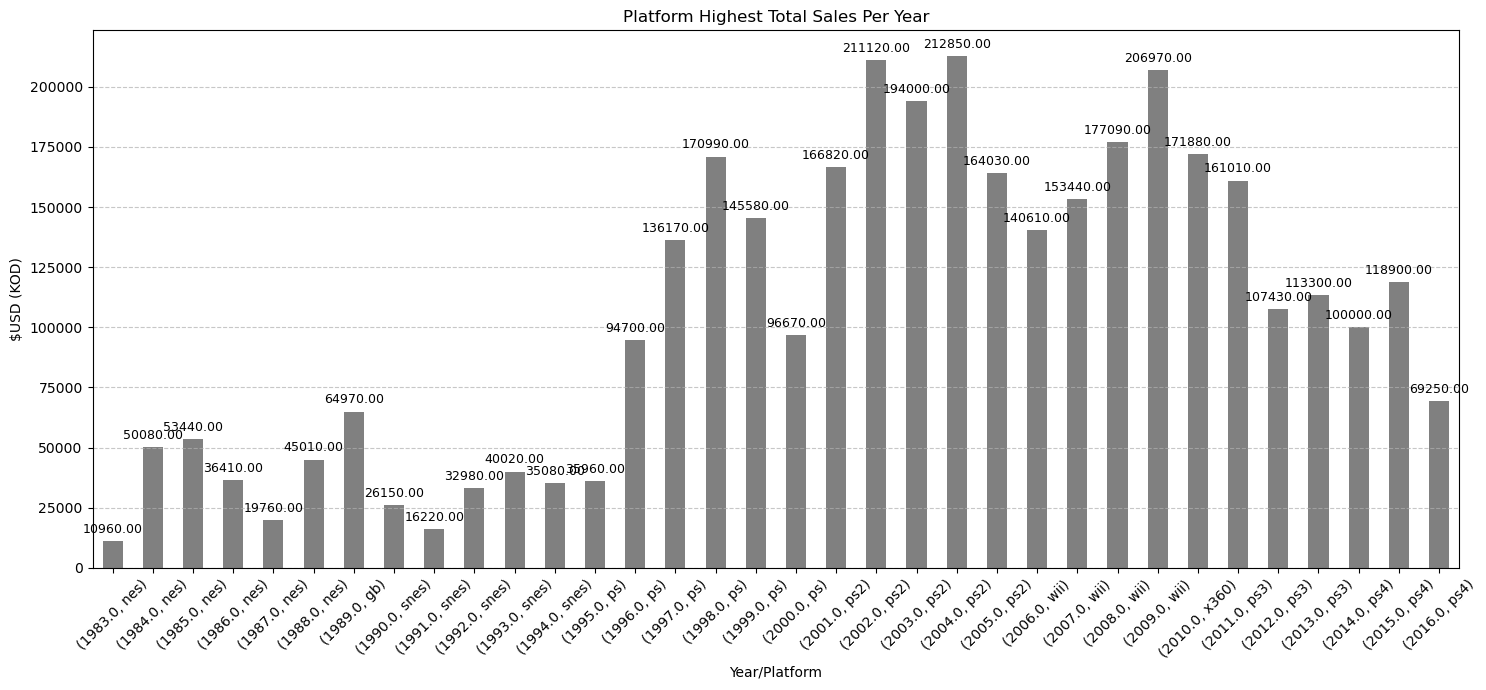

In [60]:
plot_bar_series(ds_vg_platform_year_top_sales, title='Platform Highest Total Sales Per Year', xlabel='Year/Platform', 
                ylabel='$USD (KOD)', figsize=(15, 7), color='grey', rotation=45, show_values=True, xticks=None, 
                yticks=None)

##### 3.4.4 Data visualization for Platforms that used to be popular but are now losing sales.

## 4. Conclusions and key insights

### 🎯 Key Findings

#### Behavioral Insights

- **XXX**: xxx 

#### Other Insights

- **XXX**: xxx 

### Final Takeaways

- **XXX**: xxx 

